In [1]:
from sklearn import preprocessing
from scipy import signal

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import pandas as pd
import scipy
import os, sys
import math
import scaleogram as scg
import pywt
import math

In [27]:
data_dir = "./bme512_data/csv"
data = []

for f in os.listdir(data_dir):
    if f[0] is not '.':
        print(os.path.join(data_dir, f))
        df = pd.read_csv(os.path.join(data_dir, f), index_col=0)
        data.append(df)


./bme512_data/csv\Kyu_Alex_Fast.csv
./bme512_data/csv\Kyu_Alex_Medium.csv
./bme512_data/csv\Kyu_Alex_MediumFast.csv
./bme512_data/csv\Kyu_Alex_MediumSlow.csv
./bme512_data/csv\Kyu_Alex_Slow.csv


## Choose the first file for now

In [71]:
df = data[4]
df.head()

time     dt  Angle  grav1  grav2  grav3  gyro1  gyro2  gyro3  magnet1  \
0  19820  19808      0  -9.40  -2.78  -0.25  10.06 -15.88 -32.75    35.56   
1  36732  16908      2  -9.37  -2.88  -0.19   8.88 -17.44 -30.87    35.56   
2  56448  19712      3  -9.34  -2.97  -0.12  13.13 -19.37 -31.44    37.06   
3  76344  19892      4  -9.30  -3.08  -0.03  12.25 -23.56 -32.69    37.06   
4  93008  16660      6  -9.27  -3.17   0.04   2.81 -26.69 -29.75    37.38   

   ...  accl1  accl2  accl3  linaccl1  linaccl2  linaccl3  quat1  quat2  \
0  ... -10.41  -1.38  -1.24     -1.02      1.44     -1.01   0.64  -0.08   
1  ... -10.93  -1.38  -1.31     -2.15      1.62     -2.55   0.64  -0.08   
2  ... -11.98  -0.72  -2.82     -3.35      3.26     -1.75   0.64  -0.07   
3  ... -12.94   0.88  -1.13     -3.63      3.96     -1.09   0.64  -0.07   
4  ... -11.49   1.43  -1.20     -2.22      4.61     -1.25   0.65  -0.07   

   quat3  quat4  
0  -0.71  -0.28  
1  -0.71  -0.28  
2  -0.71  -0.29  
3  -0.70  -0.29  
4  -0.70  -0.29  

[5 rows x 25 columns]

In [72]:
# sampling freqency
f = 1 / (df['dt'].mean() * 1e-6)
ns = df['time'].size
time = df['time']*1e-6
print(f)

56.32123310488055


# Plotting

Peaks are: [  19   47   94  169  199  246  271  327  412  451  495  576  598  656
  687  740  767  818  900  922  978 1007 1049 1074 1123 1197 1268 1343
 1416 1490 1561 1588 1634 1659 1706 1733 1780 1808 1853 1881 1925 1952
 1997 2024 2068 2094 2141 2167 2212 2239 2283 2310 2356 2387 2431 2459
 2507 2532 2577 2608 2656 2683 2732 2760 2807 2833 2878 2905 2950 2979
 3023 3050 3096 3123 3166 3195 3239 3265 3310 3336 3375]


C:\Users\Alexander\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Desired Angle')

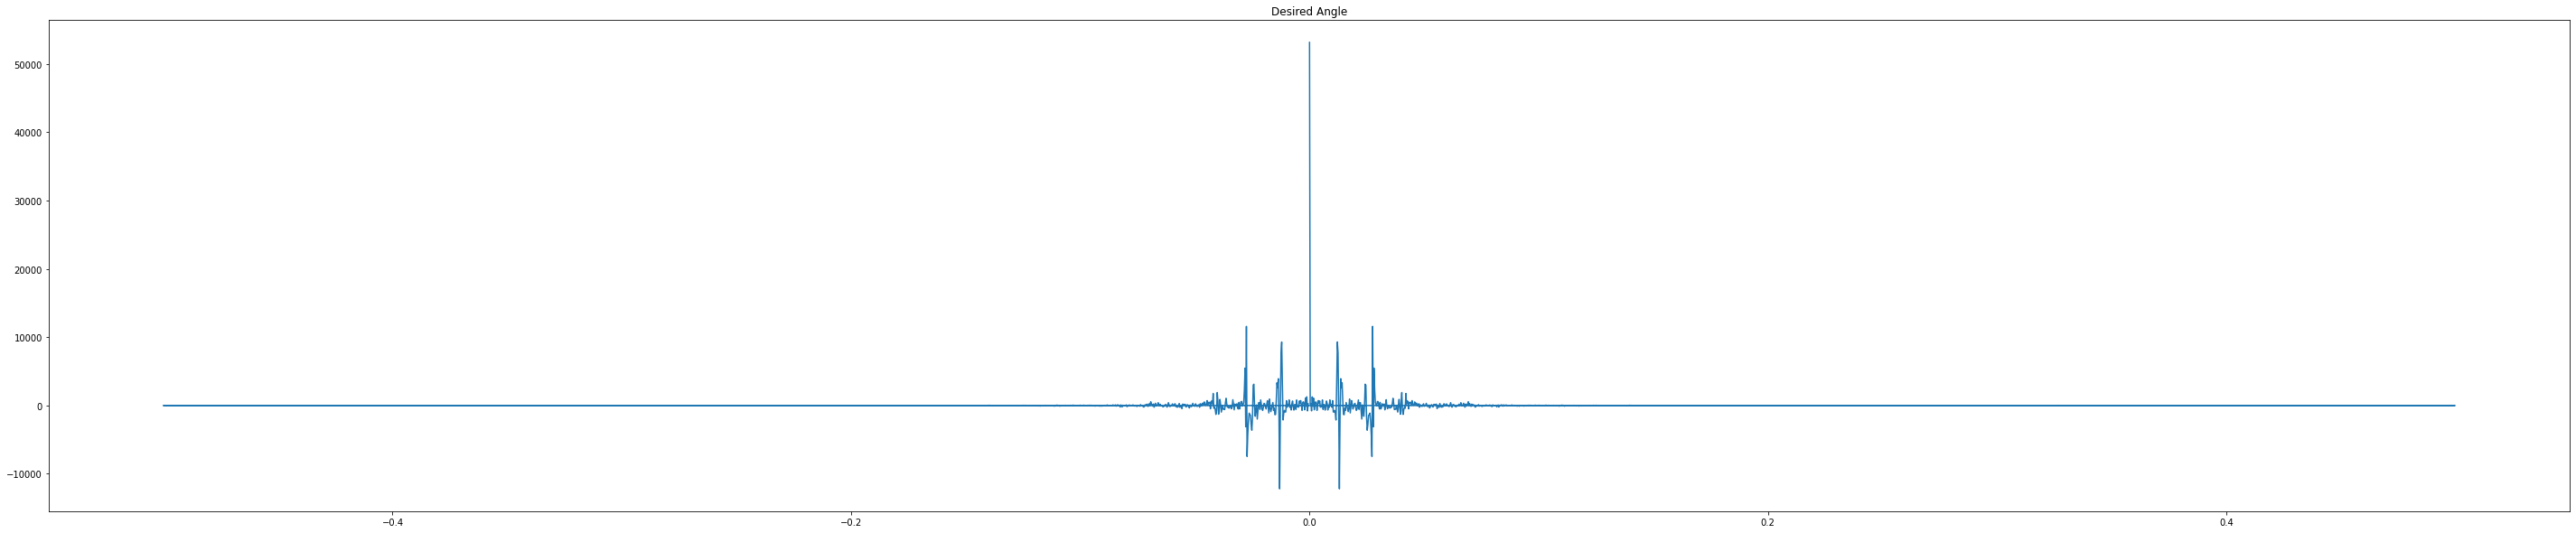

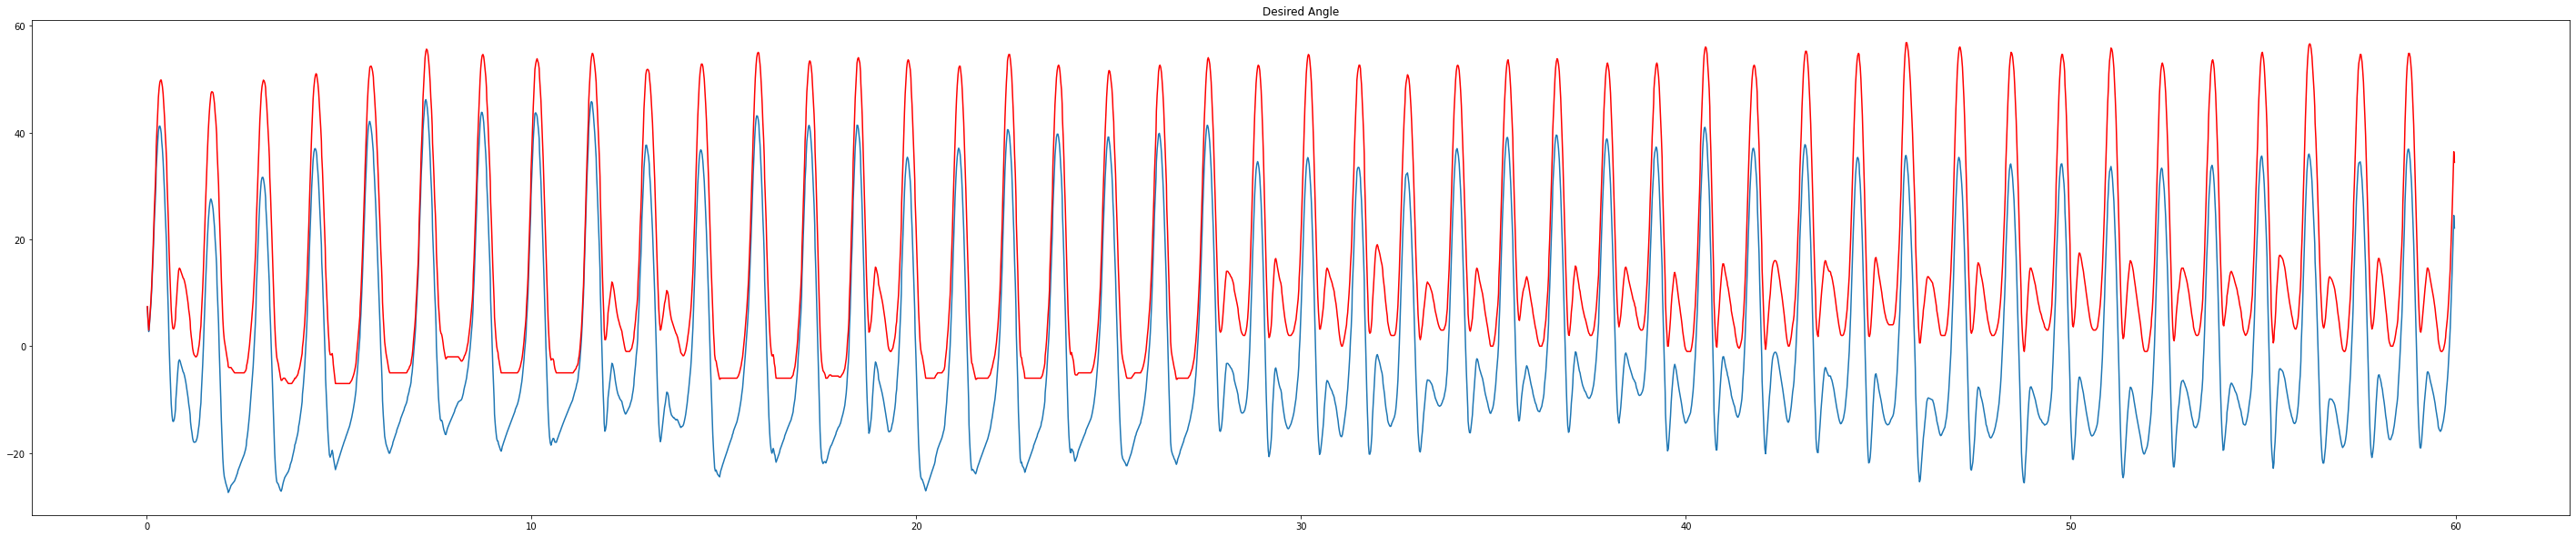

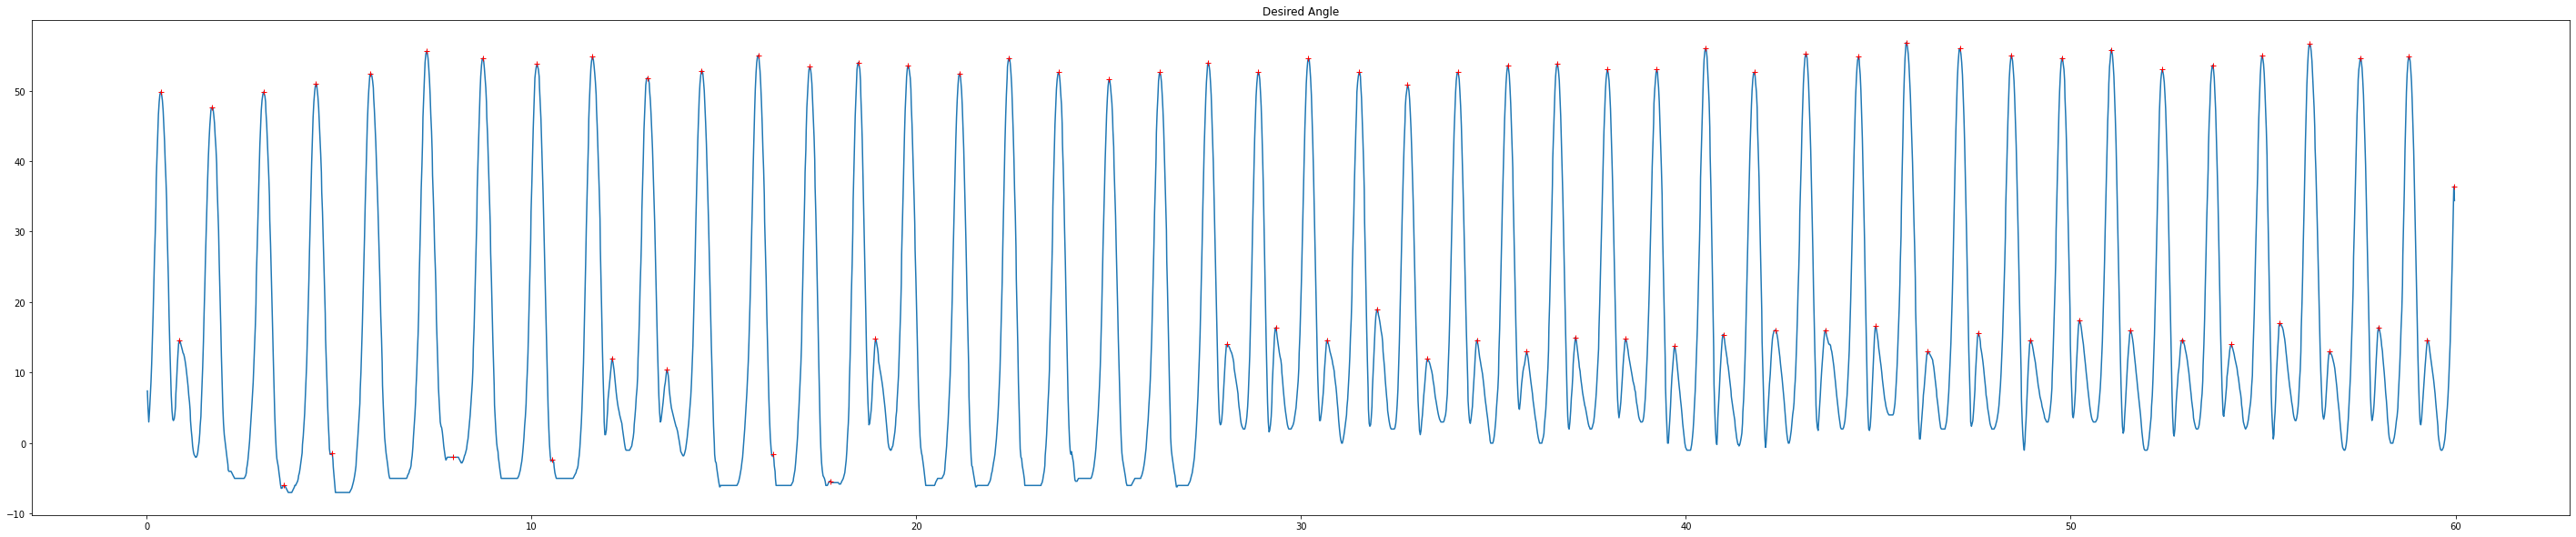

In [73]:
to_plot = -1
figsize = (50, 10)

# plt.figure(figsize=figsize, facecolor=(1,1,1))
# plt.plot(time[:to_plot], df['Angle'][:to_plot])
# plt.title('Desired Angle')

angle = df['Angle'].to_numpy()
angle = np.pad(angle, (2, 2), 'mean')
N = 5
angle_smooth = np.convolve(angle, np.ones(N)/N, mode='valid')

# plt.figure(figsize=figsize, facecolor=(1,1,1))
# plt.plot(time[:to_plot], angle_smooth[:to_plot])
# plt.title('Desired Angle')

angle_fft = np.fft.fft(angle_smooth)
freq = np.fft.fftfreq(angle_smooth.shape[-1])

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(freq[:to_plot], angle_fft[:to_plot])
plt.title('Desired Angle')

sos = scipy.signal.butter(10, 0.5, 'hp', fs=1000, output='sos')
filtered = scipy.signal.sosfilt(sos, angle_smooth)

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], filtered[:to_plot], time[:to_plot], angle_smooth[:to_plot], 'r')
plt.title('Desired Angle')

# Peak Detection
# indexes = scipy.signal.find_peaks_cwt(angle_smooth, np.arange(1, 20),
#     max_distances=np.arange(1, 20)*2)
# indexes = np.array(indexes) - 1
# print(type(indexes))


# indexes = scipy.signal.argrelextrema(
#     np.array(angle_smooth),
#     comparator=np.greater,order=2
# )
# indexes = np.array(indexes).flatten()

indexes, _ = scipy.signal.find_peaks(angle_smooth, distance=20)

print('Peaks are: %s' % (indexes))
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], angle_smooth[:to_plot], time[indexes], angle_smooth[indexes], 'r+')
plt.title('Desired Angle')

(3378,)
(3378,)


Text(0.5, 1.0, 'Desired Angle and Other Parameter Smoothed')

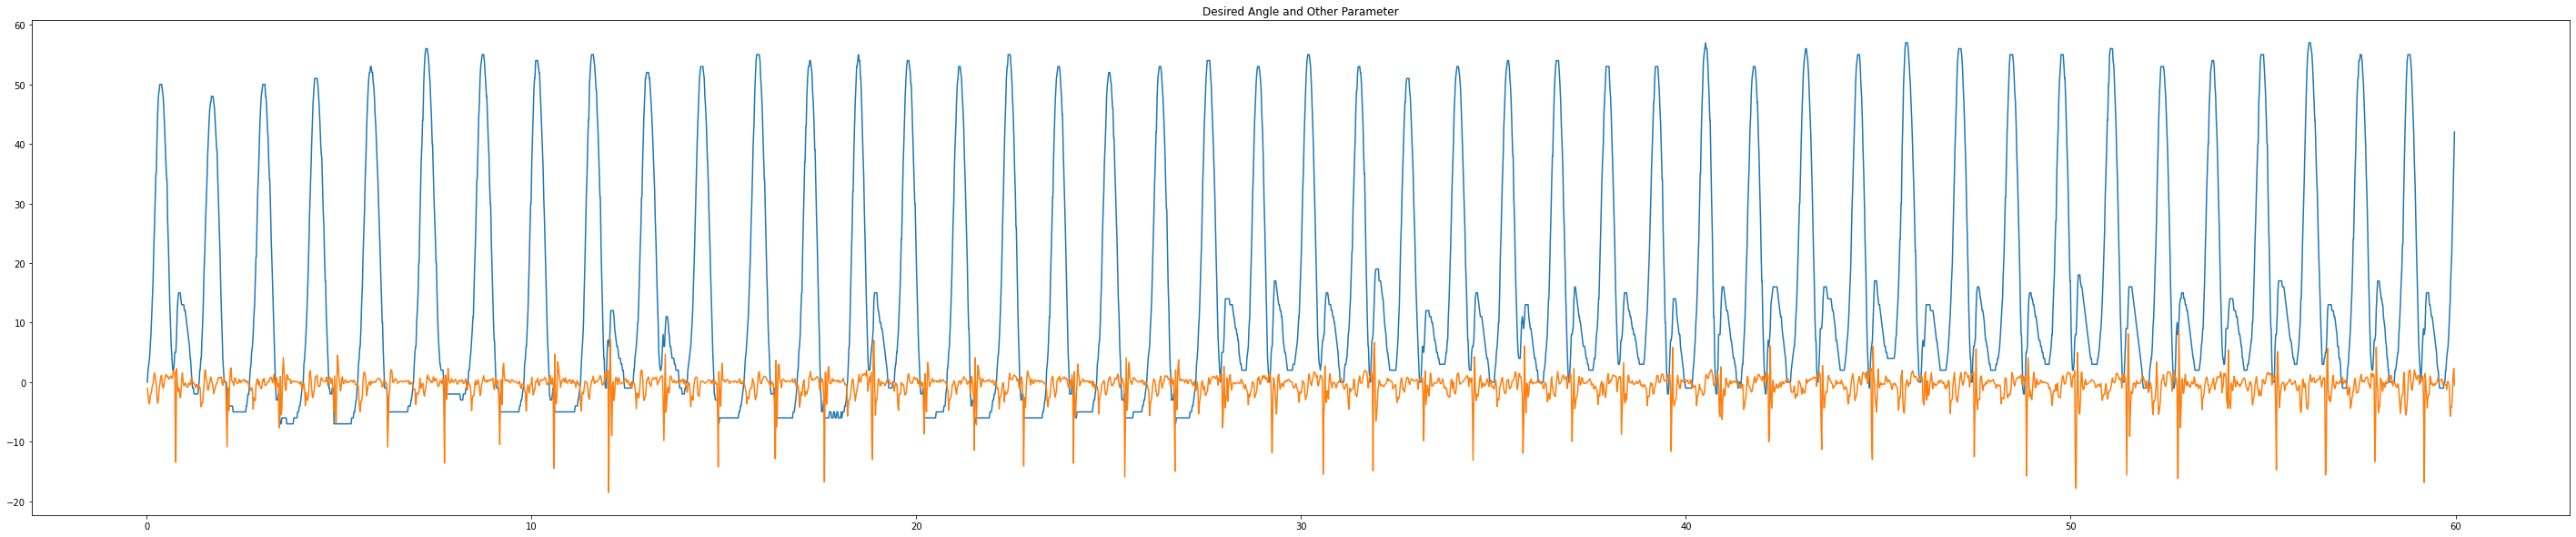

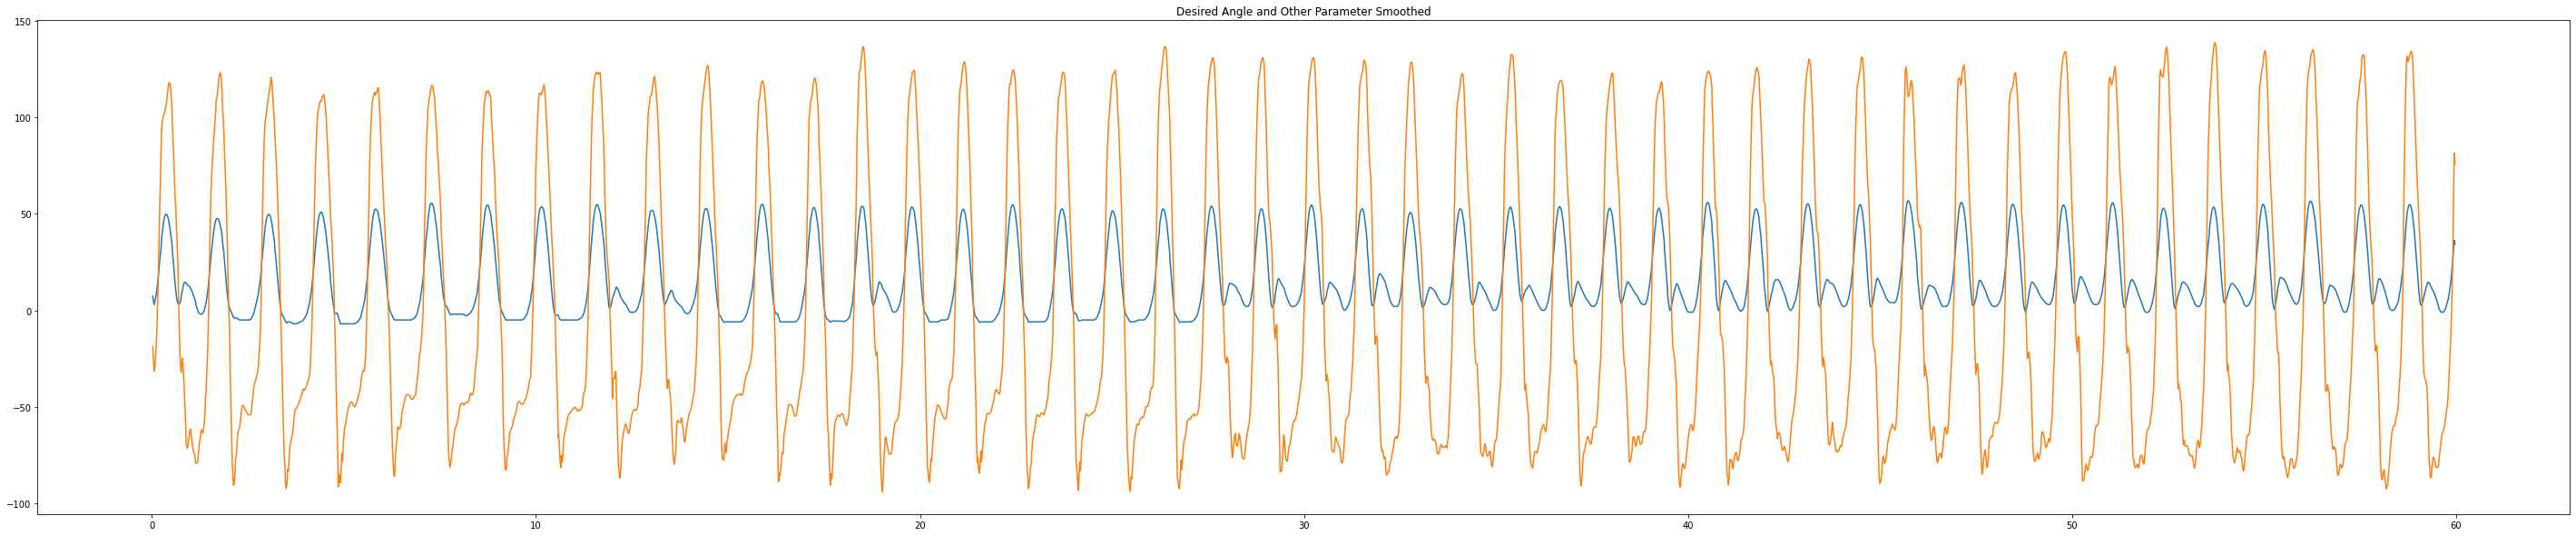

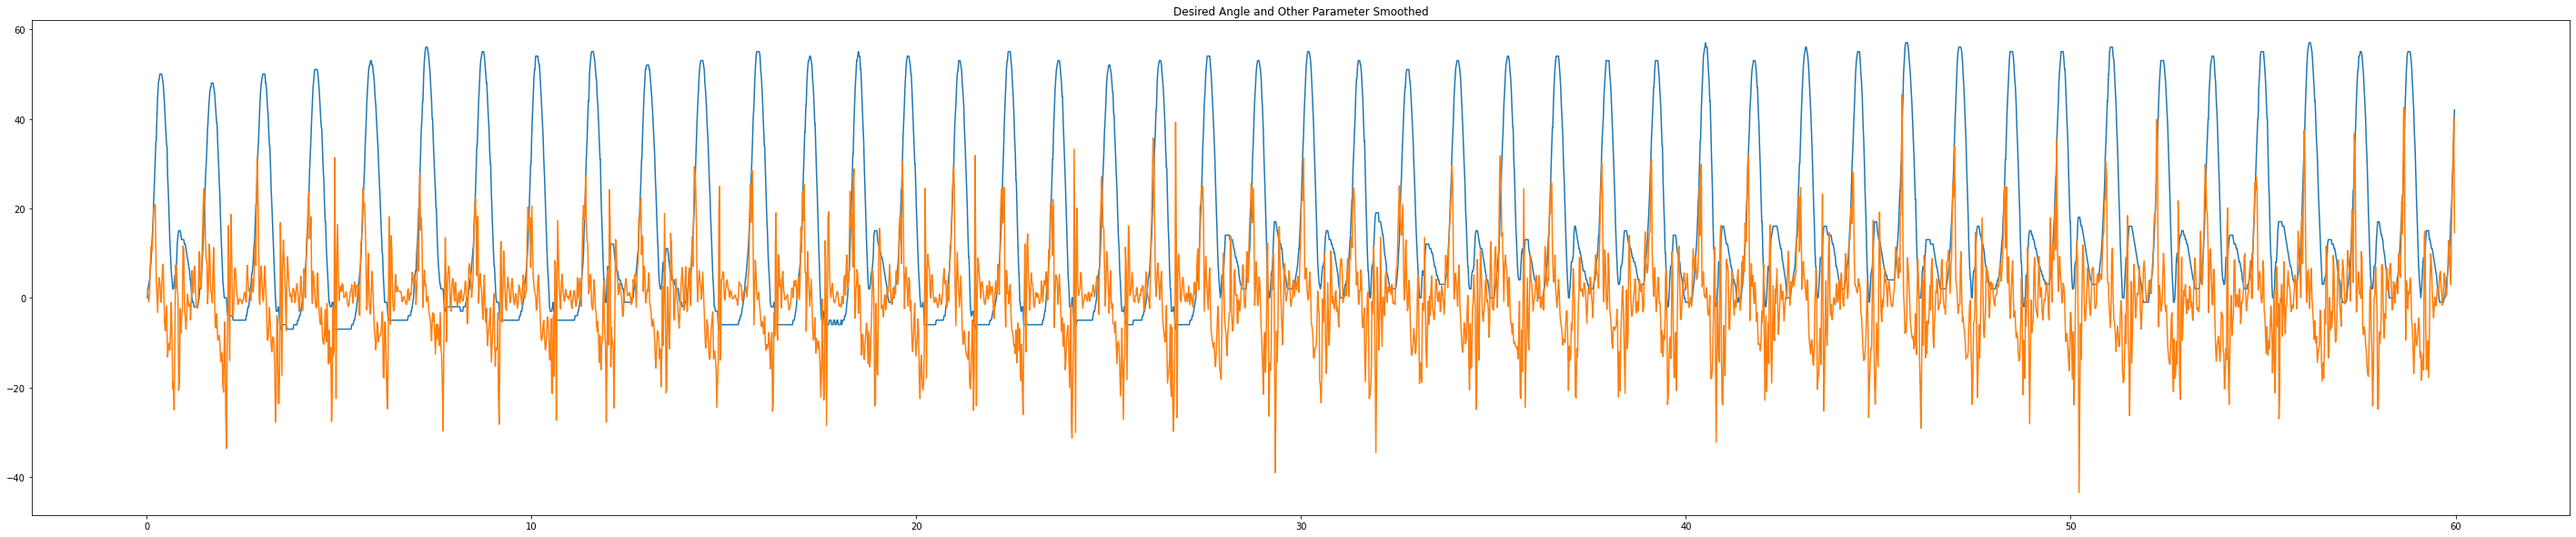

In [74]:
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['Angle'][:to_plot])
# plt.plot(time[:to_plot], df['grav2'][:to_plot])
# plt.plot(time[:to_plot], df['gyro2'][:to_plot])
# plt.plot(time[:to_plot], df['gyro3'][:to_plot])
plt.plot(time[:to_plot], df['linaccl1'][:to_plot])
plt.title('Desired Angle and Other Parameter')

chosen_param =  df['gyro3'].to_numpy()



angle = df['Angle'].to_numpy()
angle_padded = np.pad(angle, (2, 2), 'mean')
chosen_param_padded = np.pad(chosen_param, (2, 2), 'mean')
N = 5

angle_smooth = np.convolve(angle_padded, np.ones(N)/N, mode='valid')
chosen_param_smooth = np.convolve(chosen_param_padded, np.ones(N)/N, mode='valid')

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], angle_smooth[:to_plot])
plt.plot(time[:to_plot], chosen_param_smooth[:to_plot])
plt.title('Desired Angle and Other Parameter Smoothed')



angle_grad = np.gradient(angle)
print(time.shape)
print(angle_grad.shape)
chosen_param_grad = np.gradient(chosen_param)

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], angle[:to_plot])
plt.plot(time[:to_plot], chosen_param_grad[:to_plot])
plt.title('Desired Angle and Other Parameter Smoothed')

Text(0.5, 1.0, 'Linear Acceleartion')

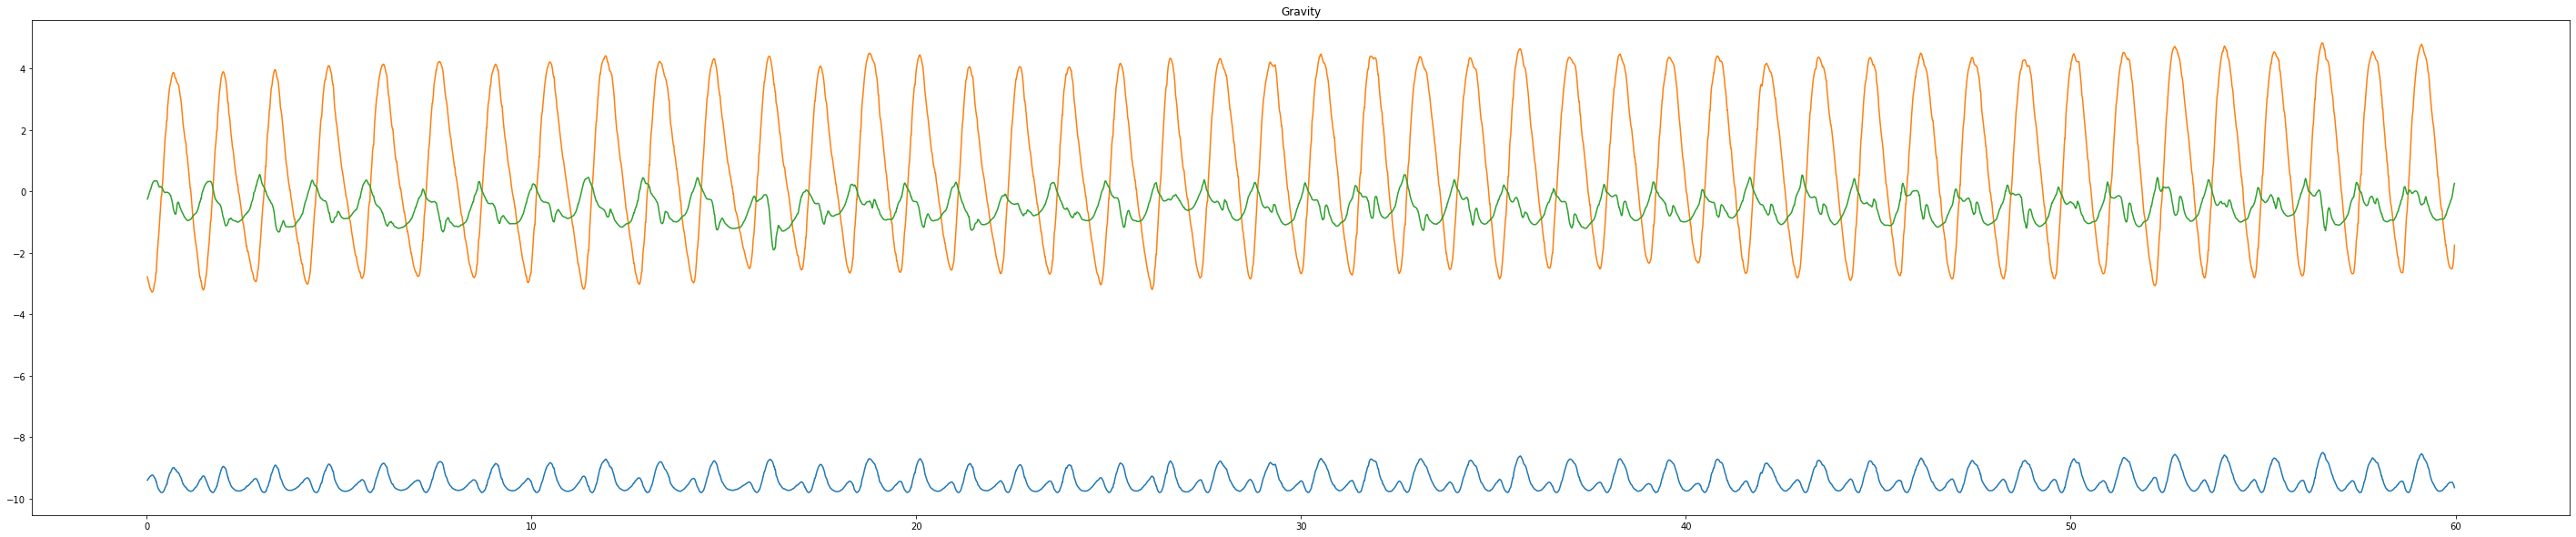

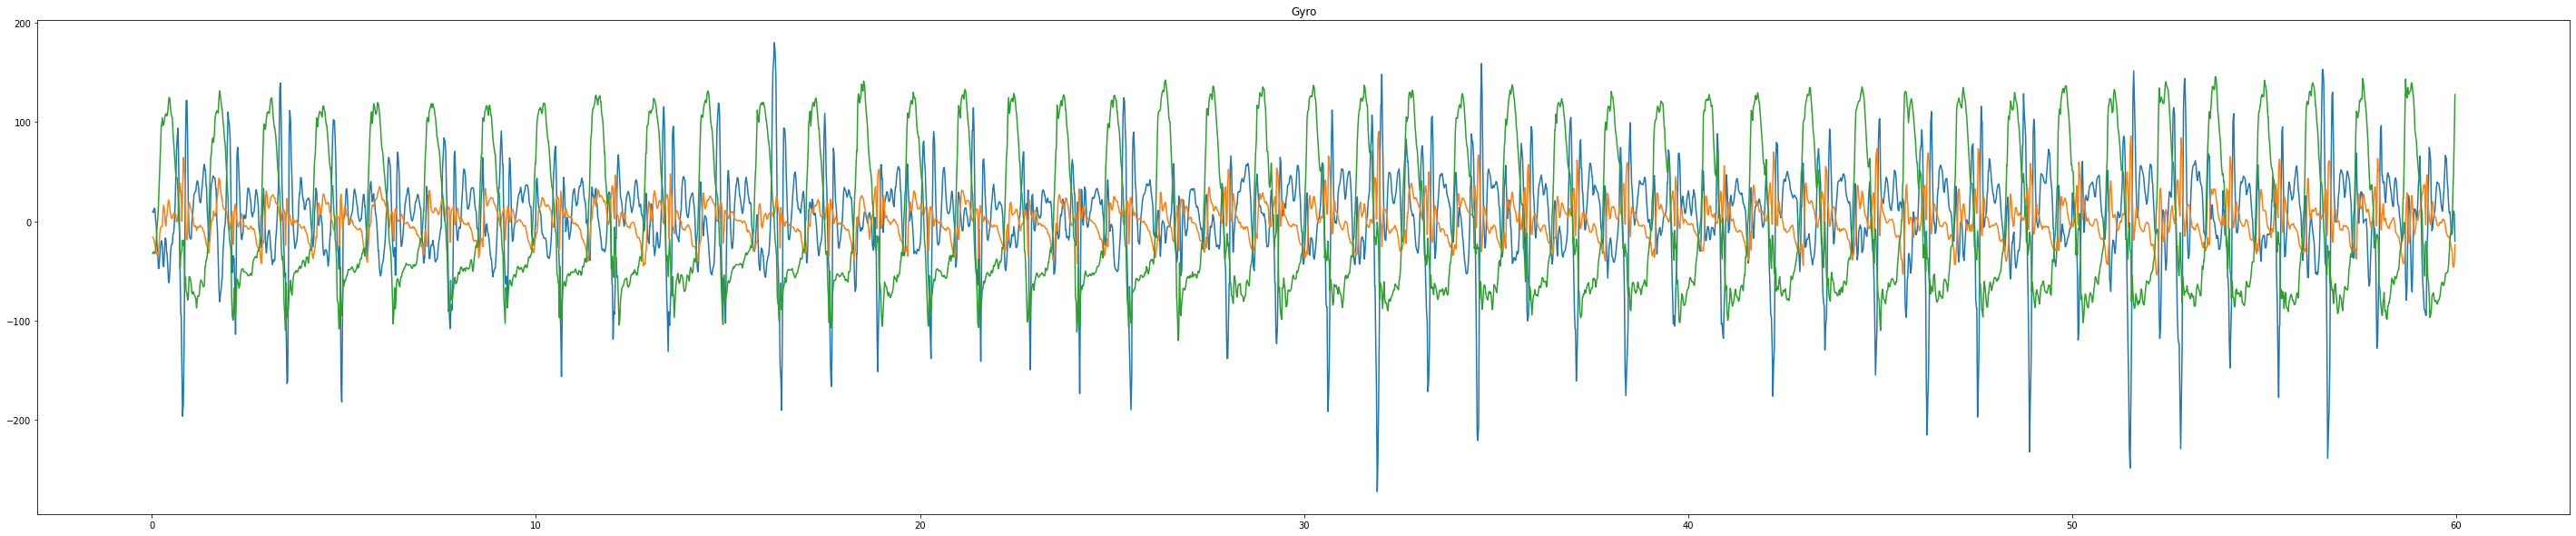

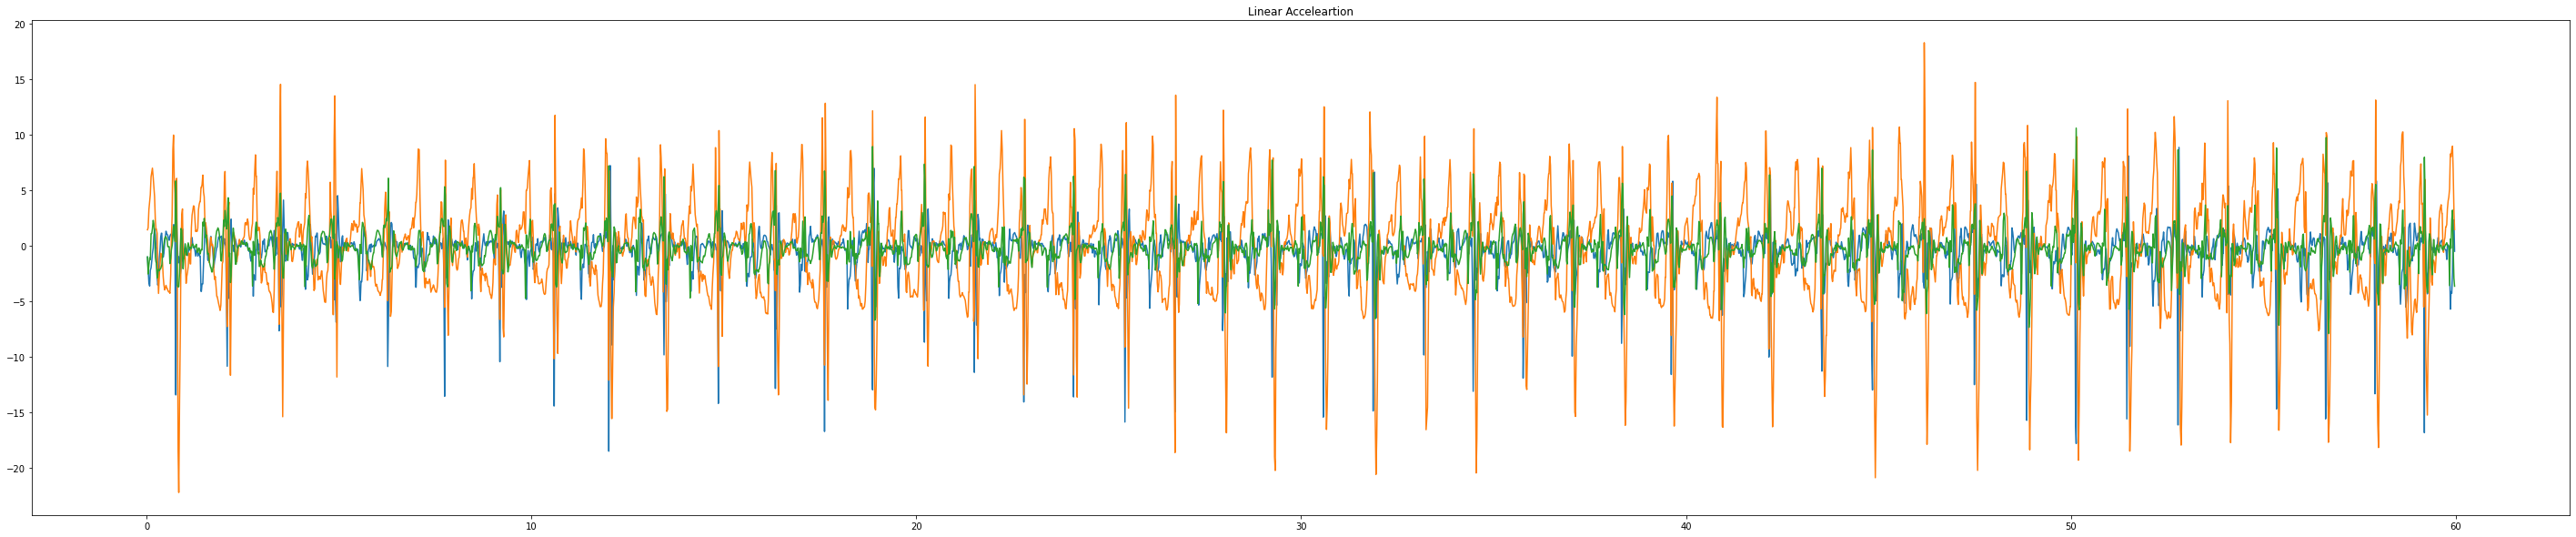

In [75]:
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['grav1'][:to_plot])
plt.plot(time[:to_plot], df['grav2'][:to_plot])
plt.plot(time[:to_plot], df['grav3'][:to_plot])
plt.title('Gravity')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['gyro1'][:to_plot])
plt.plot(time[:to_plot], df['gyro2'][:to_plot])
plt.plot(time[:to_plot], df['gyro3'][:to_plot])
plt.title('Gyro')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['linaccl1'][:to_plot])
plt.plot(time[:to_plot], df['linaccl2'][:to_plot])
plt.plot(time[:to_plot], df['linaccl3'][:to_plot])
plt.title('Linear Acceleartion')

Text(0.5, 1.0, 'Rotation')

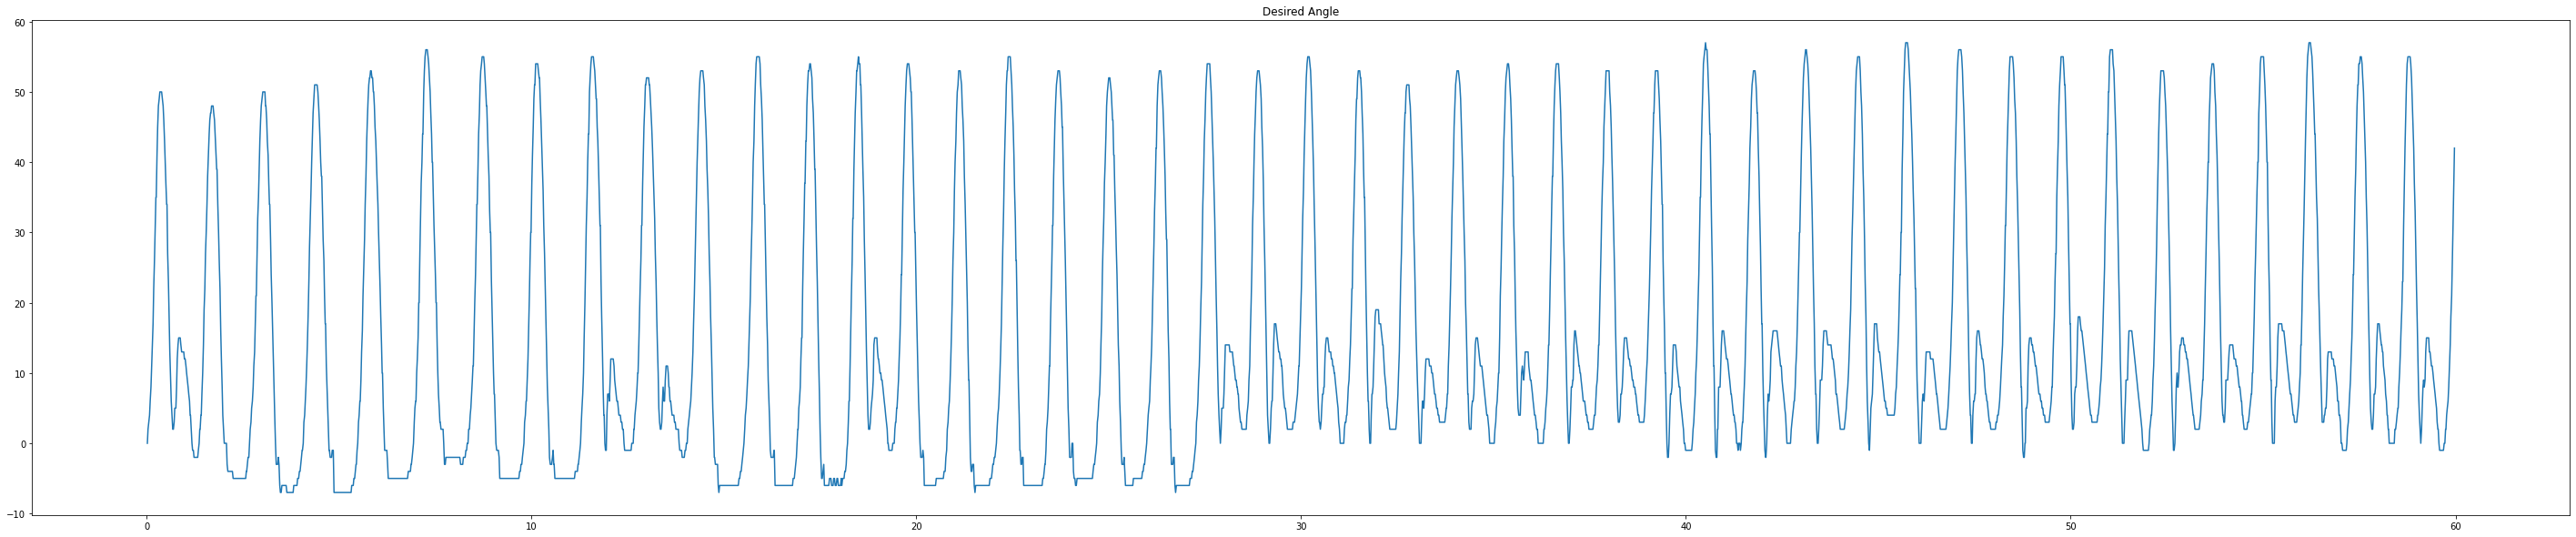

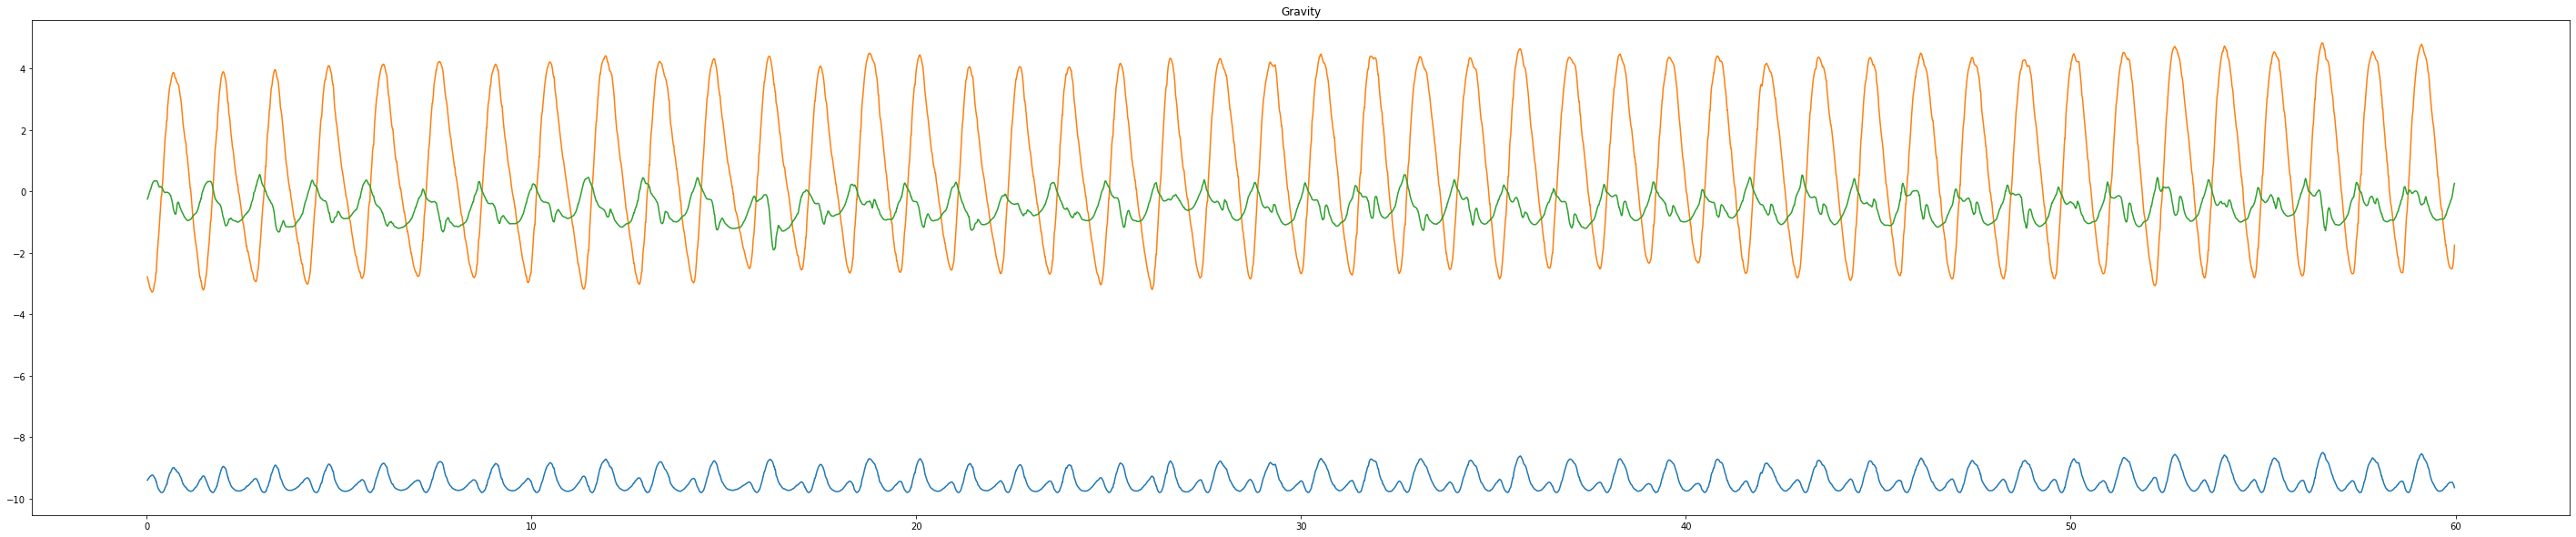

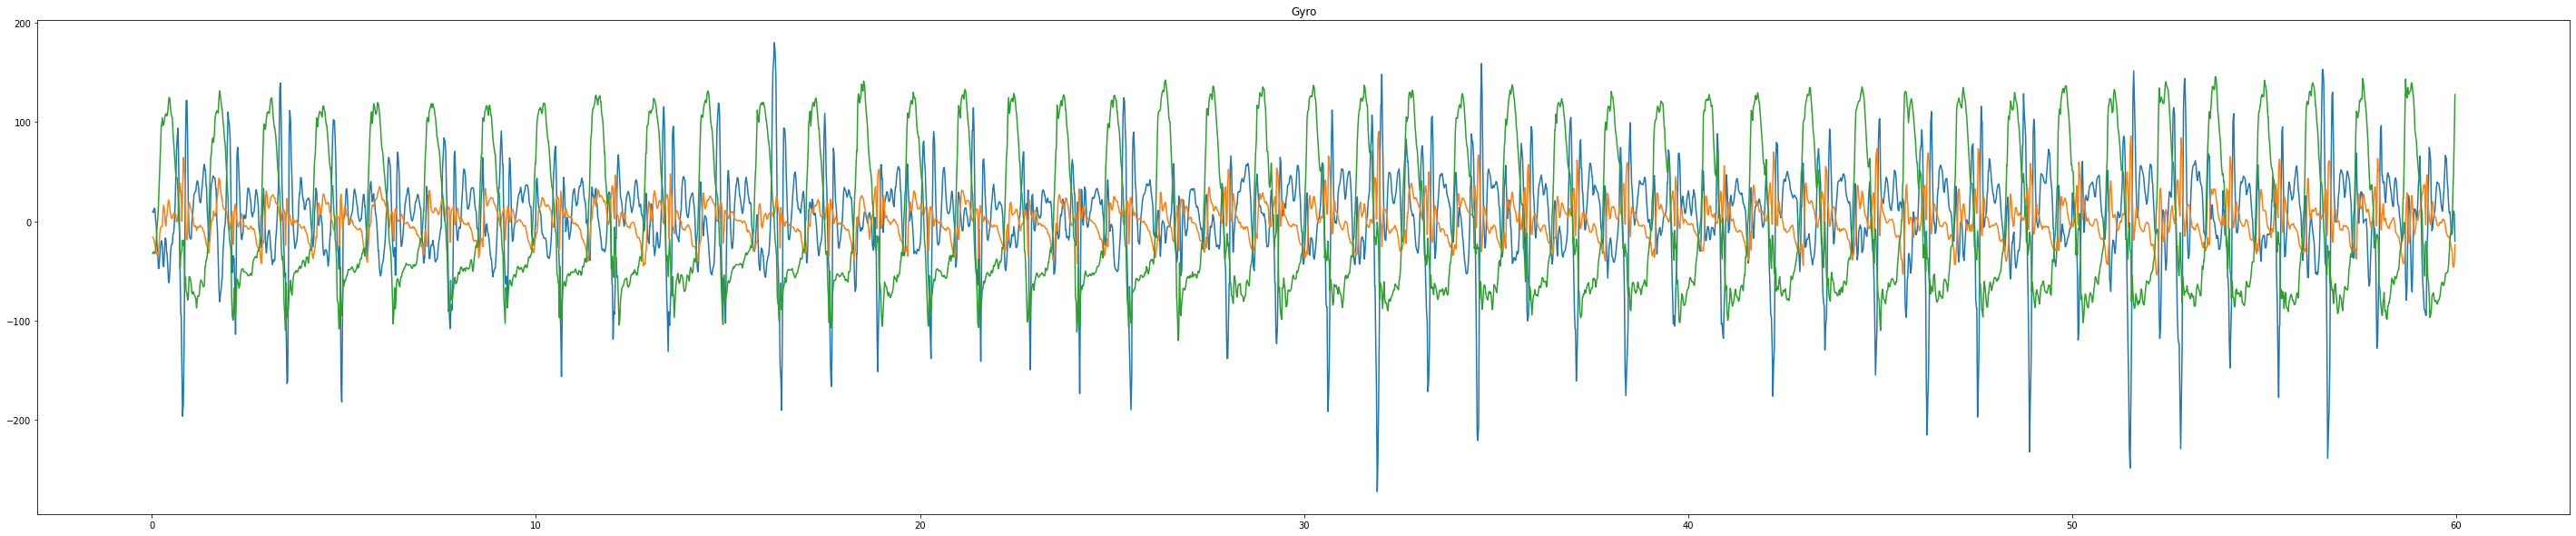

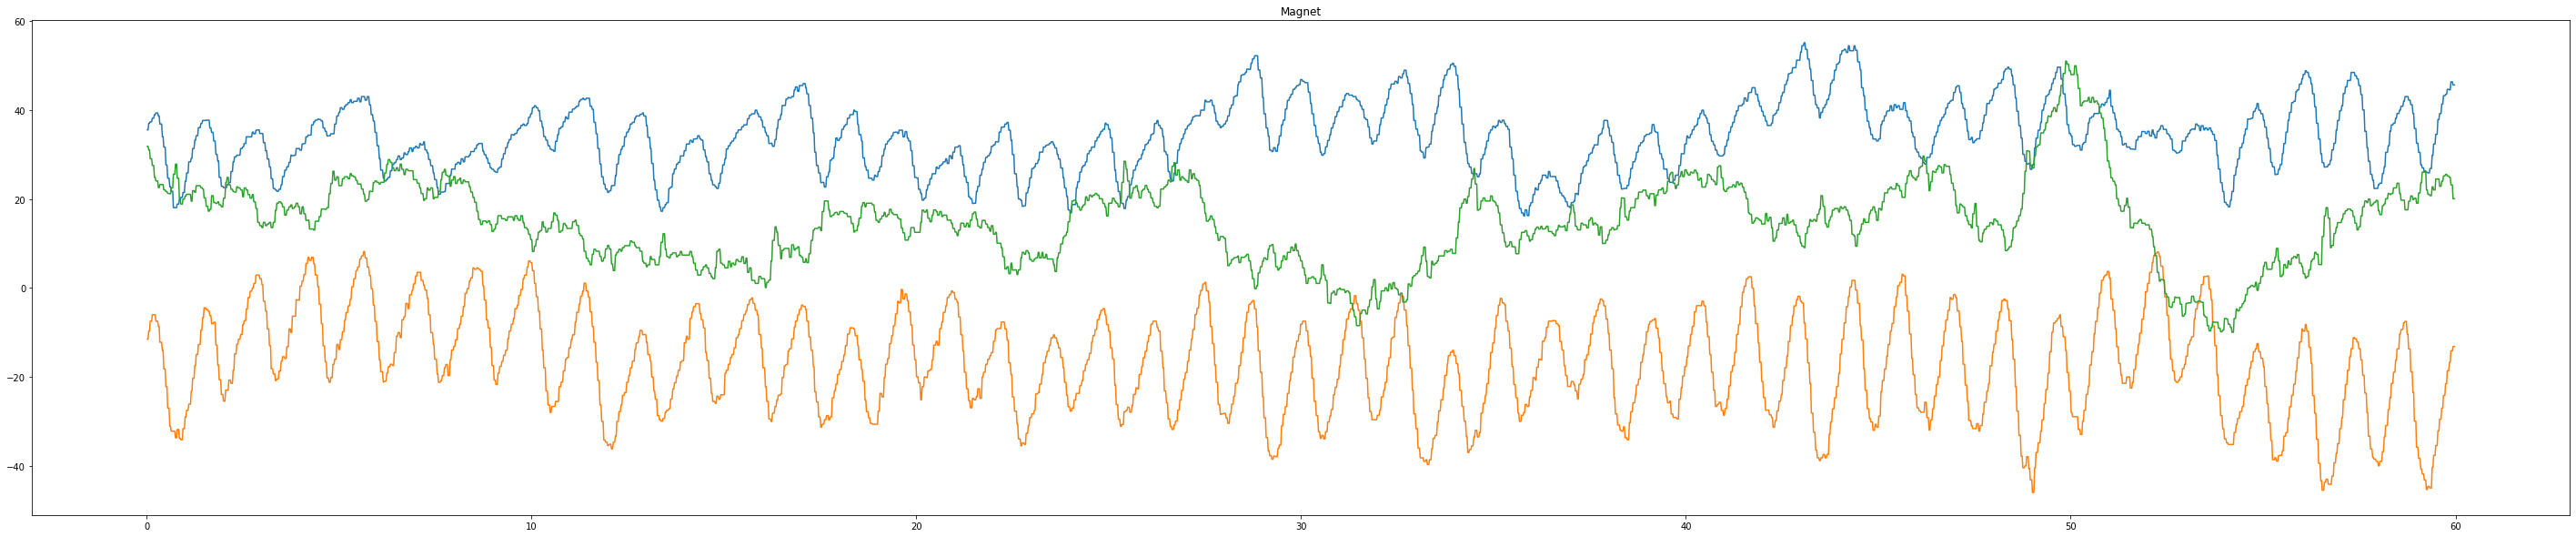

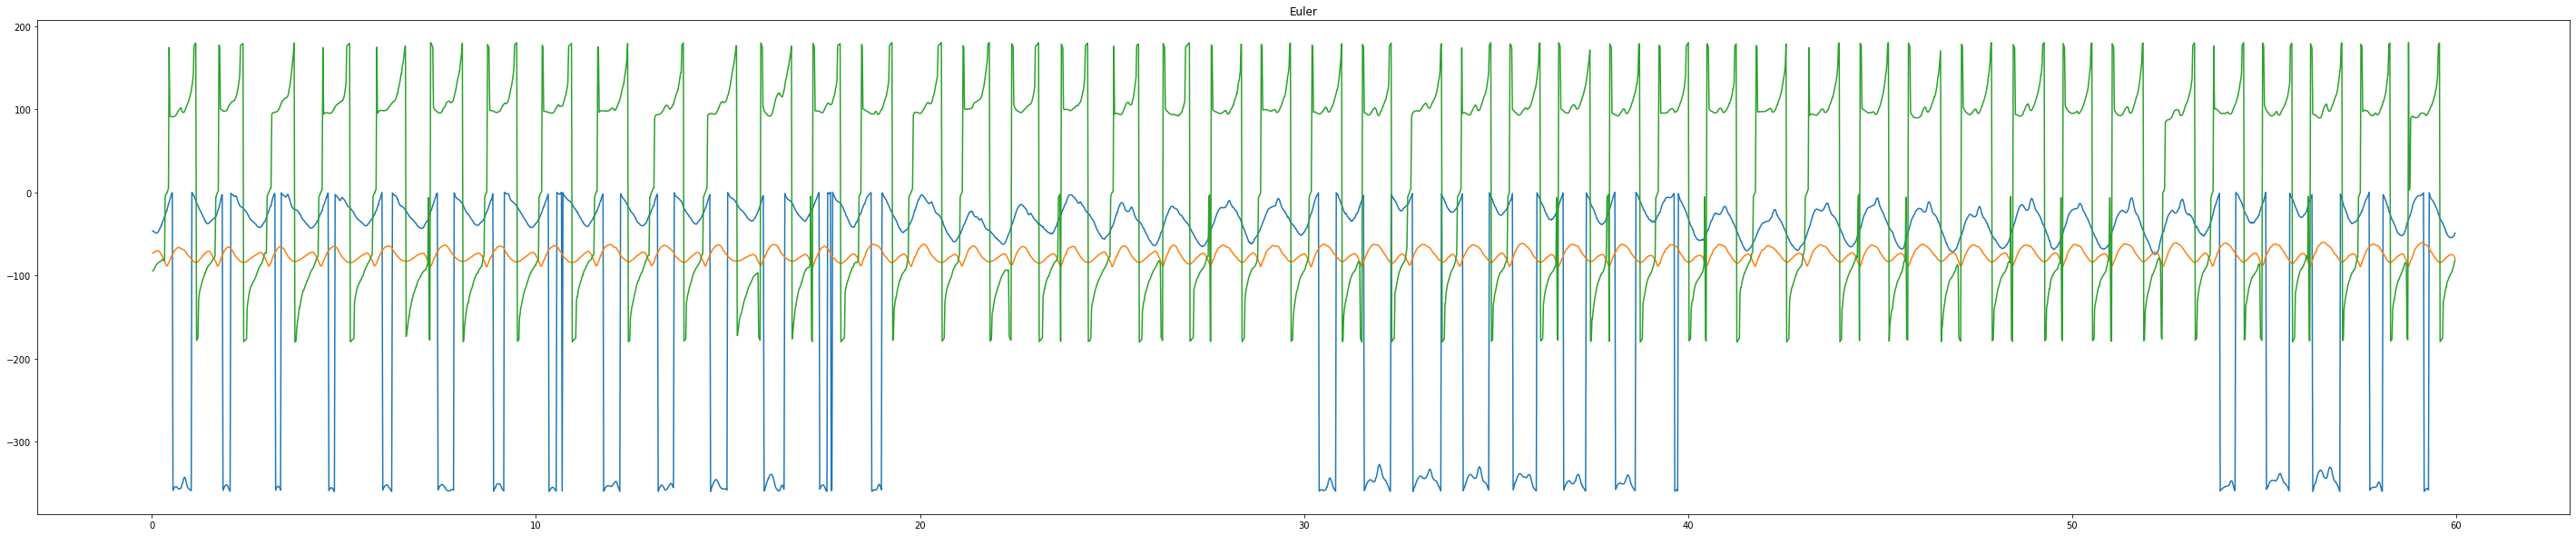

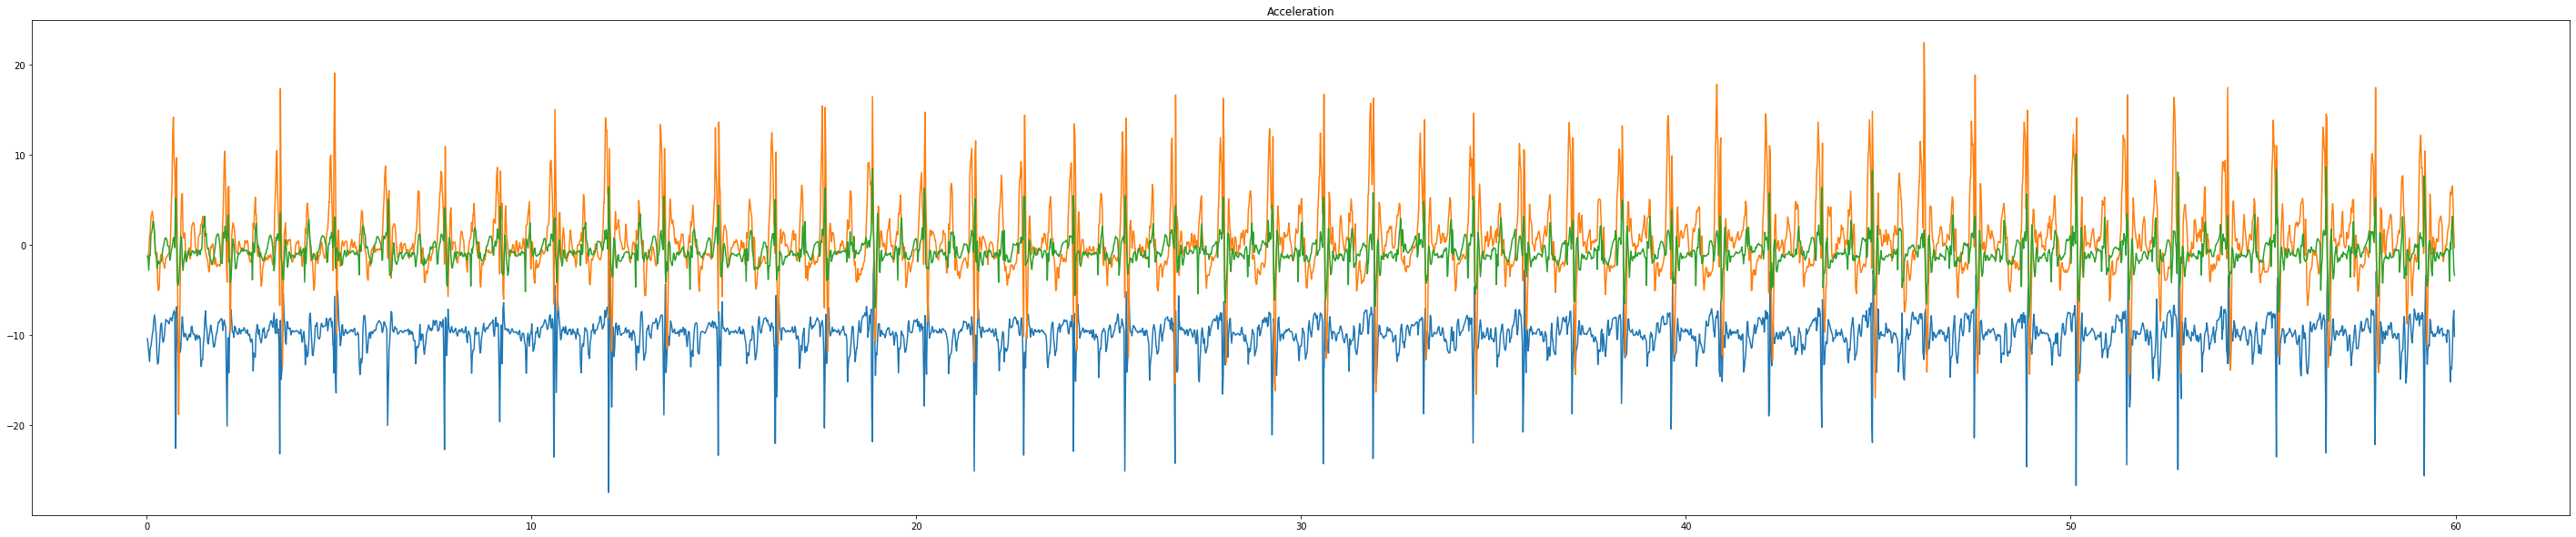

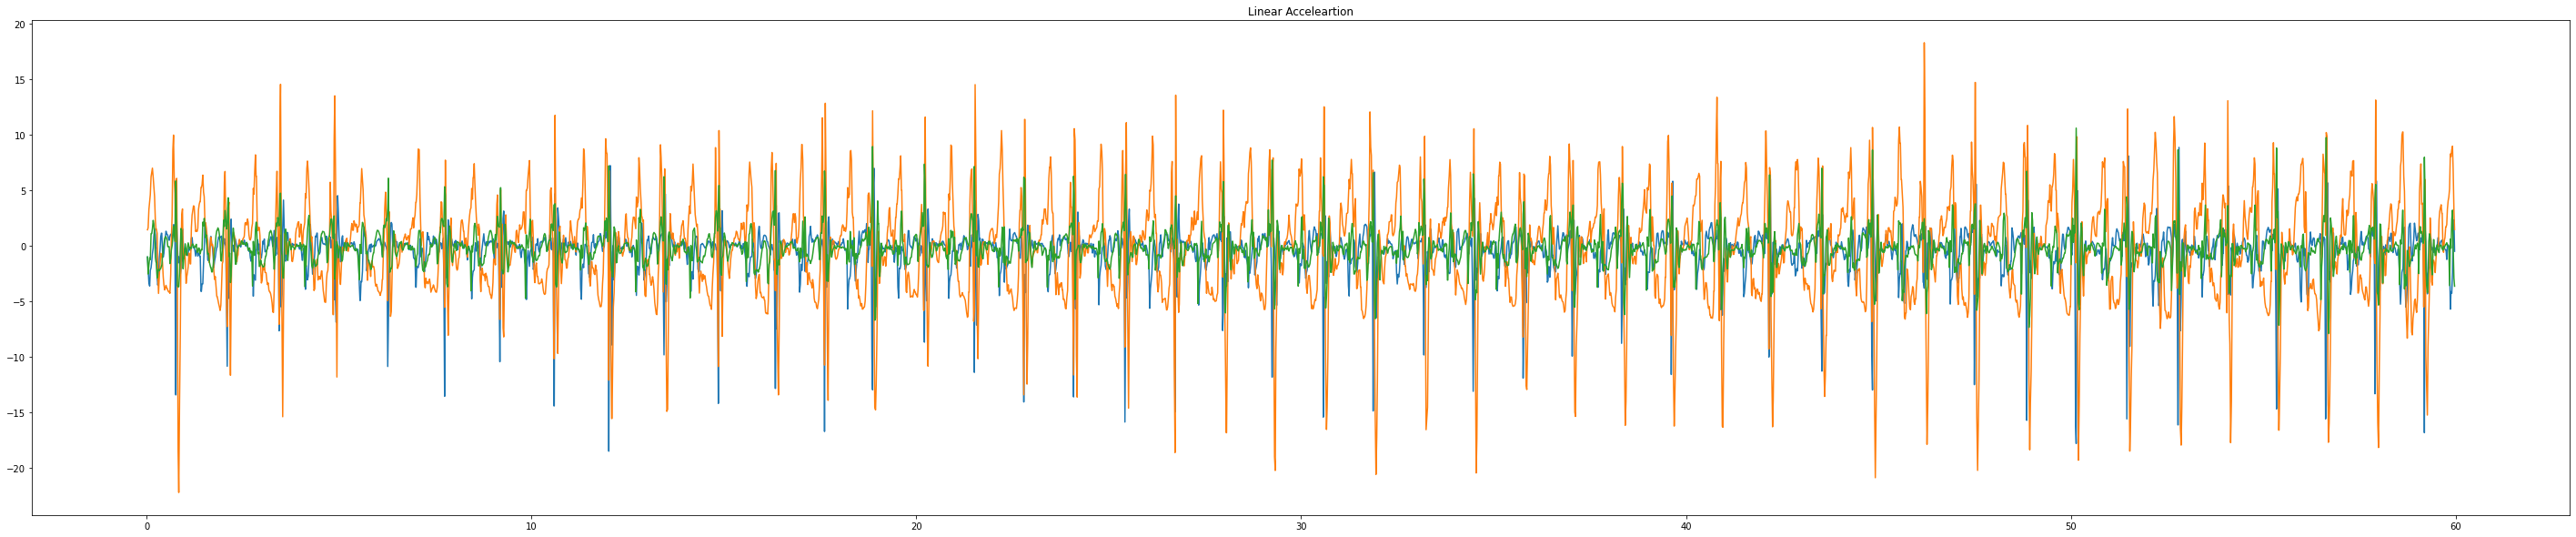

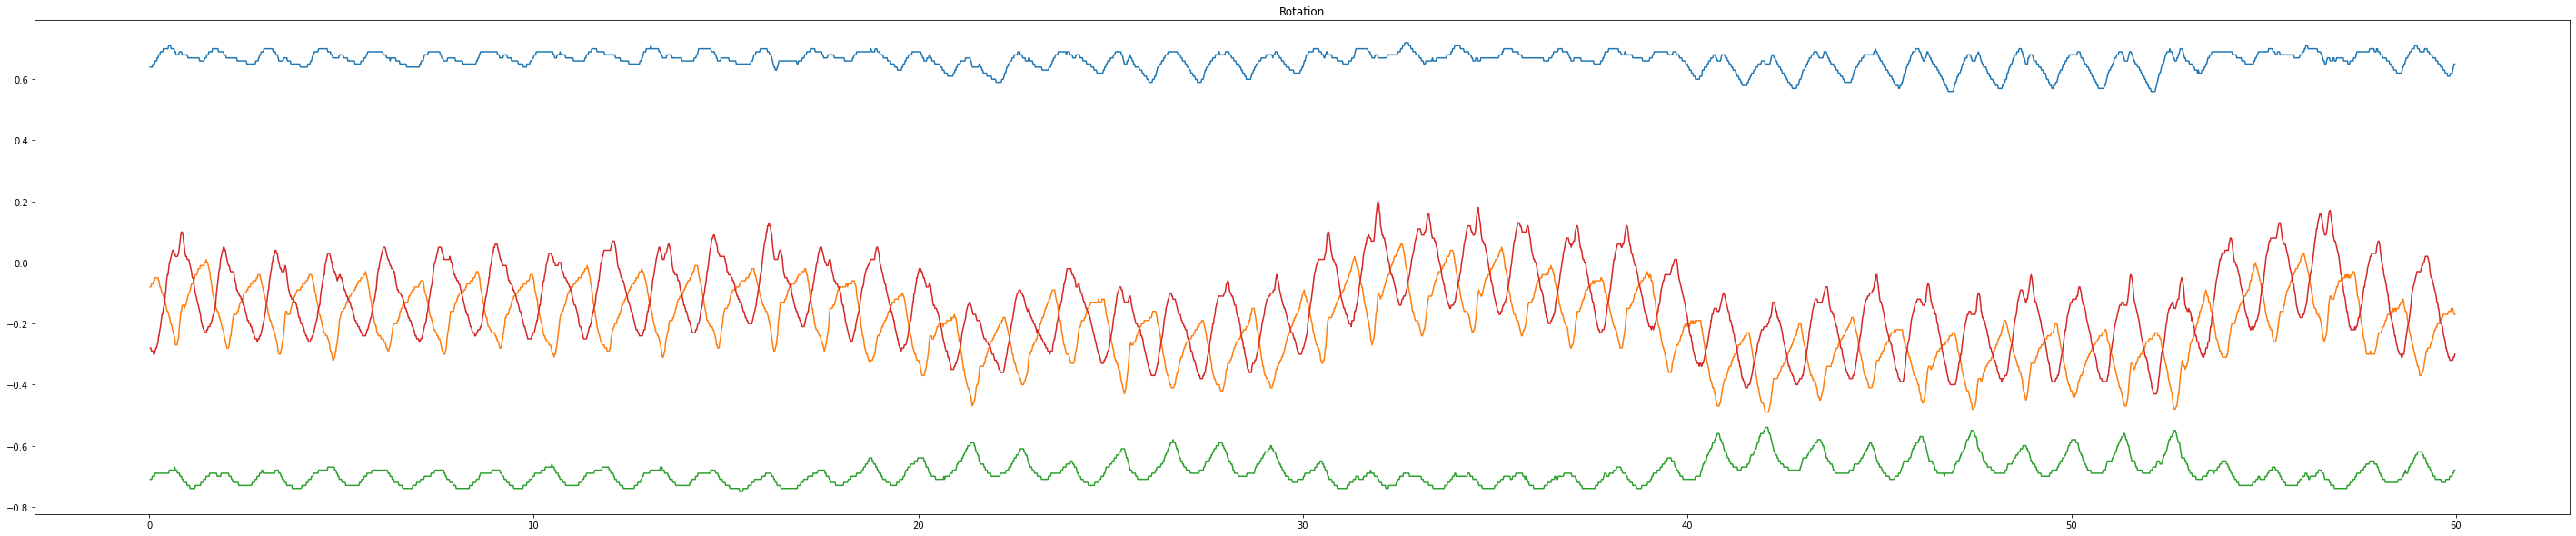

In [76]:
to_plot = -1
figsize = (50, 10)

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['Angle'][:to_plot])
plt.title('Desired Angle')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['grav1'][:to_plot])
plt.plot(time[:to_plot], df['grav2'][:to_plot])
plt.plot(time[:to_plot], df['grav3'][:to_plot])
plt.title('Gravity')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['gyro1'][:to_plot])
plt.plot(time[:to_plot], df['gyro2'][:to_plot])
plt.plot(time[:to_plot], df['gyro3'][:to_plot])
plt.title('Gyro')
plt.figure(figsize=figsize, facecolor=(1,1,1)) # magnet bad
plt.plot(time[:to_plot], df['magnet1'][:to_plot])
plt.plot(time[:to_plot], df['magnet2'][:to_plot])
plt.plot(time[:to_plot], df['magnet3'][:to_plot])
plt.title('Magnet')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['euler1'][:to_plot])
plt.plot(time[:to_plot], df['euler2'][:to_plot])
plt.plot(time[:to_plot], df['euler3'][:to_plot])
plt.title('Euler')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['accl1'][:to_plot])
plt.plot(time[:to_plot], df['accl2'][:to_plot])
plt.plot(time[:to_plot], df['accl3'][:to_plot])
plt.title('Acceleration')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['linaccl1'][:to_plot])
plt.plot(time[:to_plot], df['linaccl2'][:to_plot])
plt.plot(time[:to_plot], df['linaccl3'][:to_plot])
plt.title('Linear Acceleartion')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['quat1'][:to_plot])
plt.plot(time[:to_plot], df['quat2'][:to_plot])
plt.plot(time[:to_plot], df['quat3'][:to_plot])
plt.plot(time[:to_plot], df['quat4'][:to_plot])
plt.title('Rotation')


## 1.3 Histograms: Central Pattern Generator?

C:\Users\Alexander\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


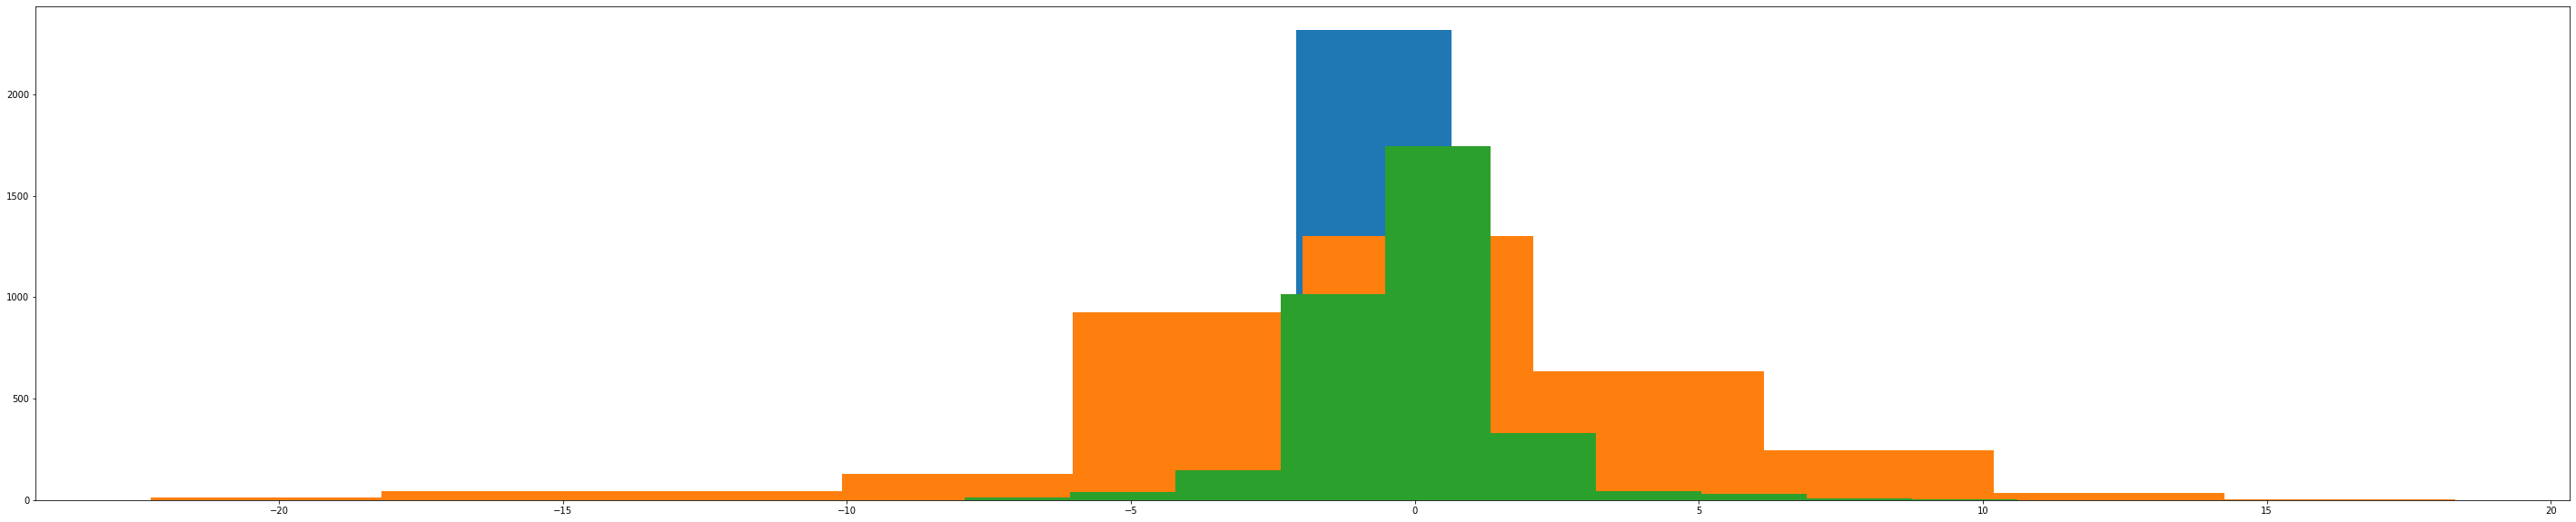

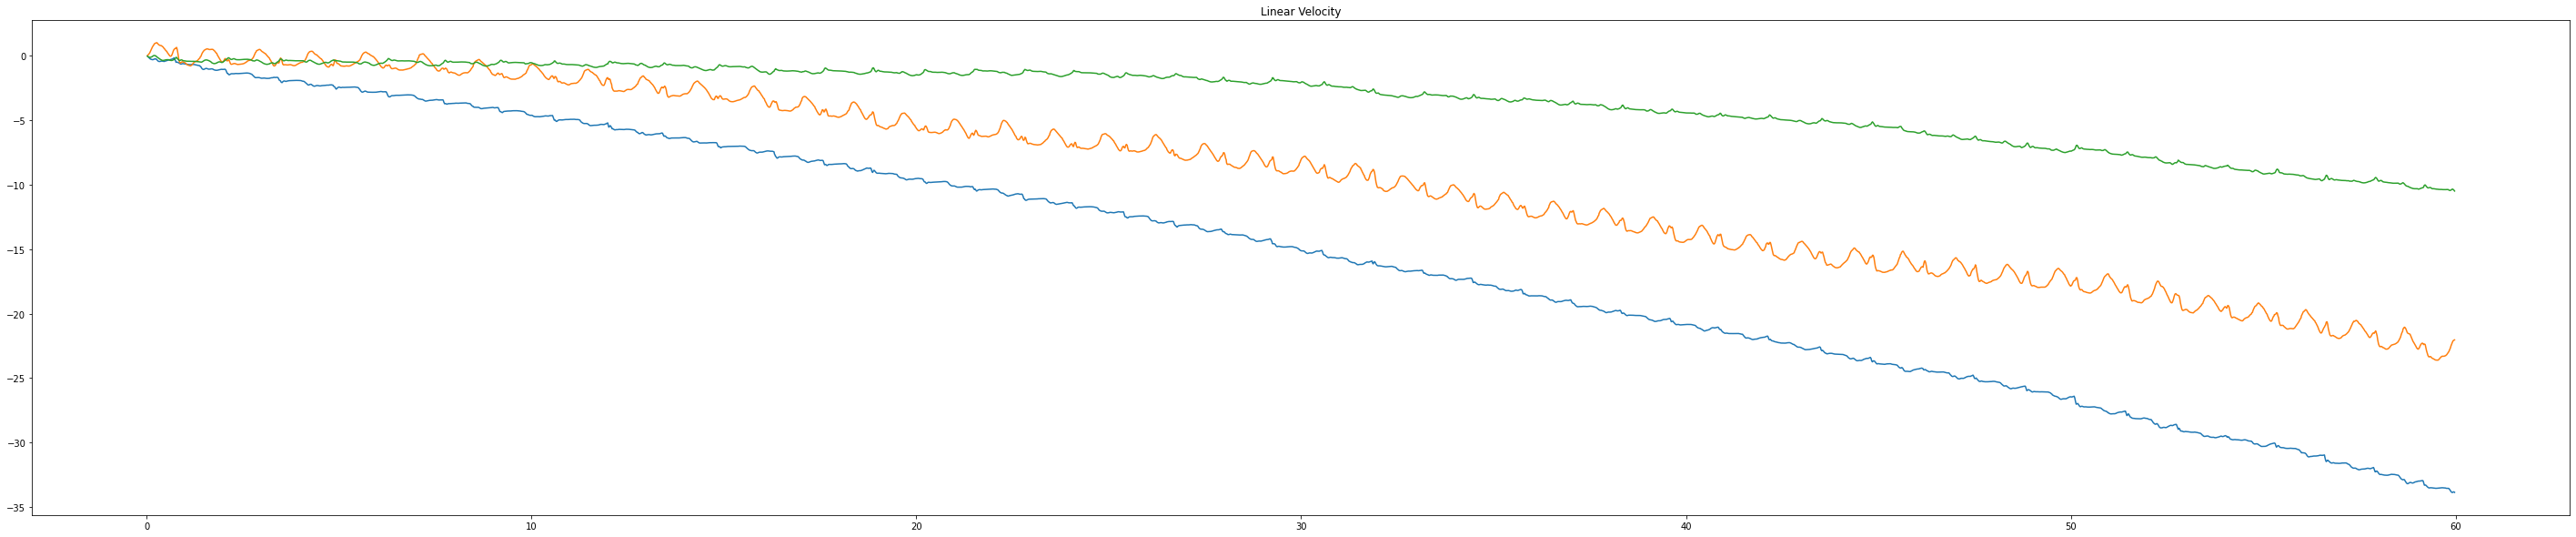

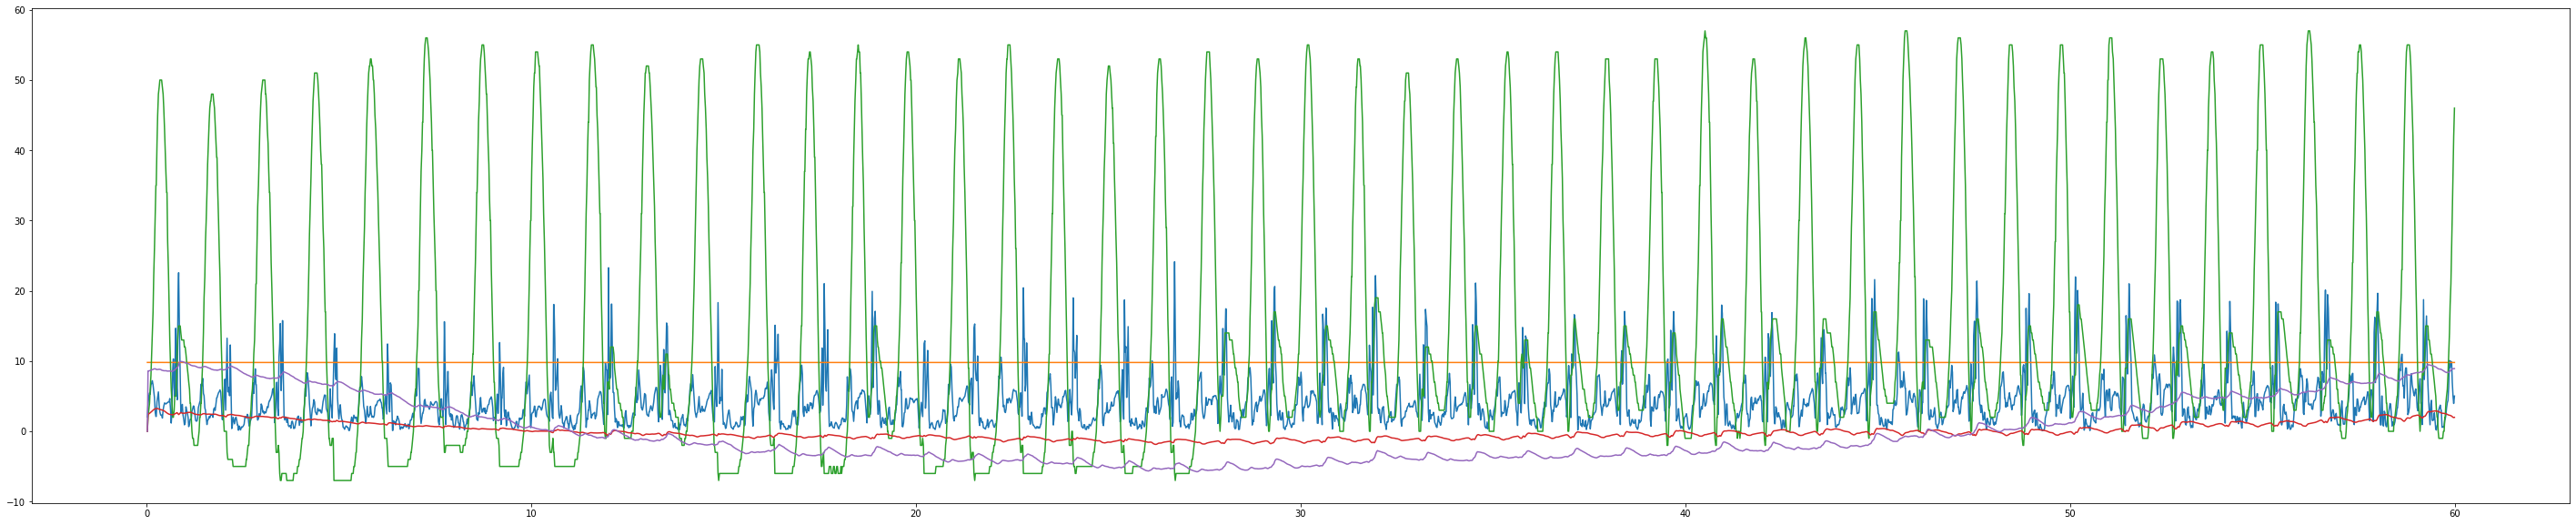

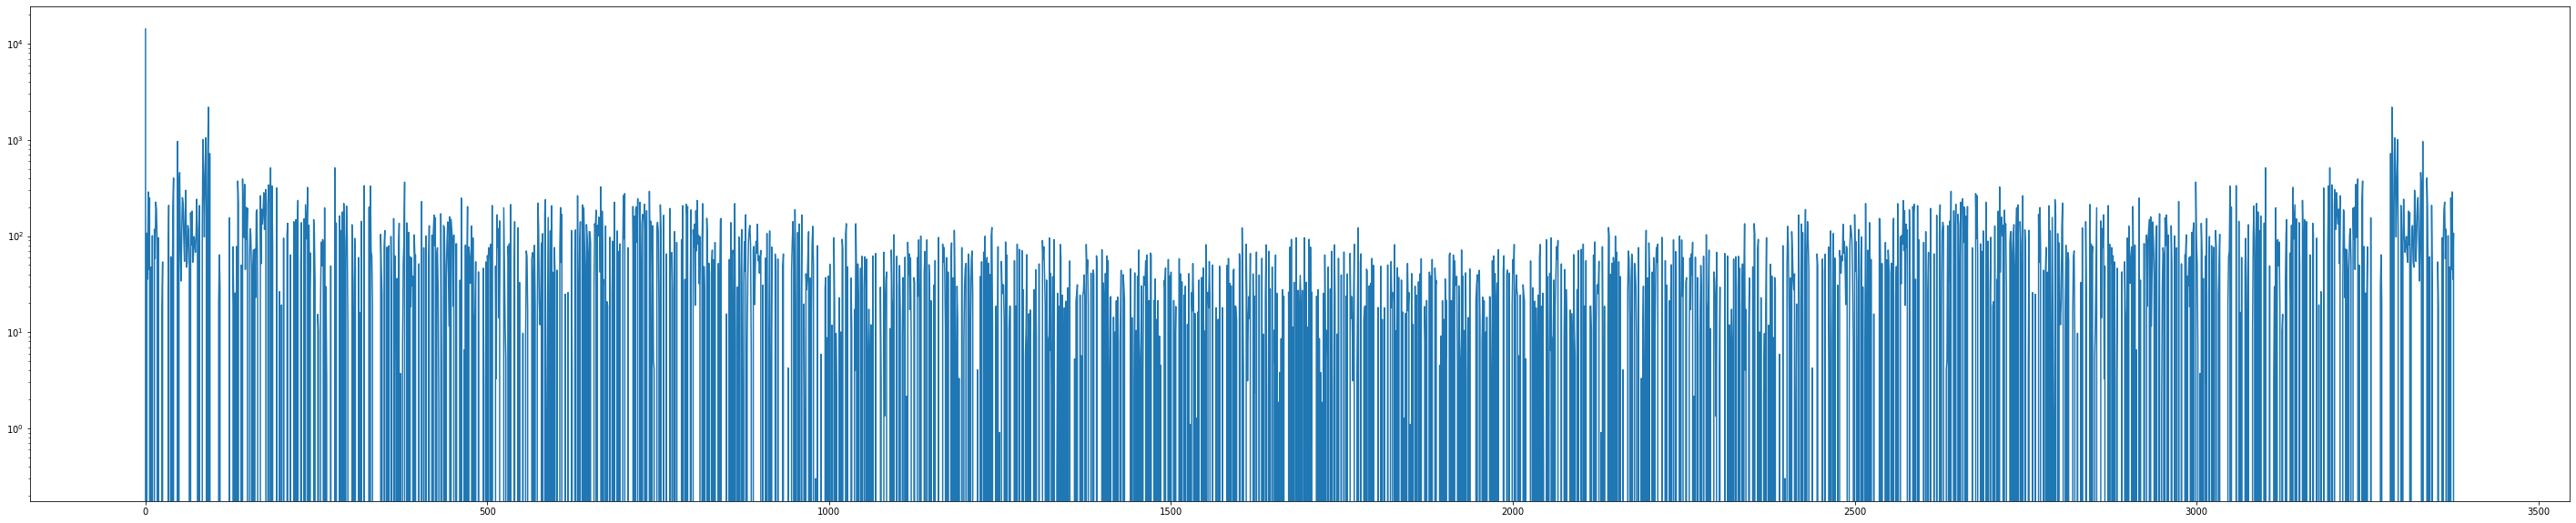

In [77]:
start = 0
to_plot = start + int(len(time))
figsize = (50, 10)

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.hist(df['linaccl1'][start:to_plot])
plt.hist(df['linaccl2'][start:to_plot])
plt.hist(df['linaccl3'][start:to_plot])

linacc_cum = (np.array(df['linaccl1'][start:to_plot])**2 + np.array(df['linaccl2'][start:to_plot])**2 + np.array(df['linaccl3'][start:to_plot])**2)**(1/2)
gravacc_cum = (np.array(df['grav1'][start:to_plot])**2 + np.array(df['grav2'][start:to_plot])**2 + np.array(df['grav3'][start:to_plot])**2)**(1/2)

linvel1 = scipy.integrate.cumtrapz(df['linaccl1'][start:to_plot], time[start:to_plot])
linvel2 = scipy.integrate.cumtrapz(df['linaccl2'][start:to_plot], time[start:to_plot])
linvel3 = scipy.integrate.cumtrapz(df['linaccl3'][start:to_plot], time[start:to_plot])
linvel_cum = (np.array(linvel1)**2 + np.array(linvel2)**2 + np.array(linvel3)**2)**(1/2)
linvel_cum = np.concatenate([np.array([0]), scipy.signal.detrend(linvel_cum)])

linvel_cum2 = scipy.integrate.cumtrapz(linacc_cum, time[start:to_plot])
linvel_cum2 = np.concatenate([np.array([0]), scipy.signal.detrend(linvel_cum2)])


plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[start:to_plot-1], linvel1)
plt.plot(time[start:to_plot-1], linvel2)
plt.plot(time[start:to_plot-1], linvel3)
plt.title('Linear Velocity')


plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[start:to_plot], linacc_cum)
plt.plot(time[start:to_plot], gravacc_cum)
plt.plot(time[start:to_plot], df['Angle'][start:to_plot])
# plt.plot(time[start:to_plot], df['linaccl3'][start:to_plot])
plt.plot(time[start:to_plot], linvel_cum)
plt.plot(time[start:to_plot], linvel_cum2)


condensed_df = pd.DataFrame({'Time': time, 'Angle': df['Angle'], 'LinAcc': linacc_cum, 'GravX': df['grav1'], 'GravY': df['grav2'], 'GravZ': df['grav3'], 'LinVel1': linvel_cum, 'LinVel2': linvel_cum2})
condensed_df.to_csv('CondensedDataSlow.csv')

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.yscale('log')
# angle_fft = np.fft.fft(df['Angle'][start:to_plot])
# plt.plot(angle_fft)
lnnacc_fft = np.fft.fft(linacc_cum)
plt.plot(lnnacc_fft)


# plt.figure(figsize=figsize, facecolor=(1,1,1))
# xcorr_time_angle = scipy.signal.correlate(time[start:to_plot], df['Angle'][start:to_plot])
# autocorr_angle = scipy.signal.correlate(df['Angle'][start:to_plot], df['Angle'][start:to_plot])
# xcorr_linaccl_time = scipy.signal.correlate(df['linaccl1'][start:to_plot], time[start:to_plot])
# autocorr_linacc1 = scipy.signal.correlate(df['linaccl1'][start:to_plot], df['linaccl1'][start:to_plot])
# plt.yscale('log')
# plt.plot(xcorr_time_angle)
# plt.plot(autocorr_angle)
# plt.plot(xcorr_linaccl_time)
# plt.plot(autocorr_linacc1)


In [19]:
test = np.array([0, 1, 2])
test2 = np.concatenate([np.array([0]), test])
test2

array([0, 0, 1, 2])

# Data Cleaning

In [8]:
feats_to_use = ['Angle','grav1','grav2','grav3','gyro1','gyro2','gyro3','euler1','euler2','euler3','accl1','accl2','accl3']
data_arr = np.array(df[feats_to_use])
y = data_arr[:,0]
X = data_arr[:,1:]
X = preprocessing.scale(X)
X

array([[-1.12831738, -0.2631609 ,  0.23592709, ...,  0.08615109,
        -0.2901832 , -0.06648078],
       [-1.15407363, -0.33897747,  0.28693035, ..., -0.02368537,
        -0.37278008, -0.20424436],
       [-1.15407363, -0.39204907,  0.32093252, ...,  0.07322915,
        -0.39113494, -0.05627607],
       ...,
       [ 0.72613305,  1.0446749 , -0.08709355, ...,  0.19598755,
        -0.68940144,  0.37232176],
       [ 1.00945187,  1.14323644, -0.1550979 , ...,  0.35428126,
        -0.32459857,  0.25496759],
       [ 1.18974566,  1.19630803, -0.24010333, ...,  0.38981659,
         0.94418126,  1.41320219]])

## Scaleograms

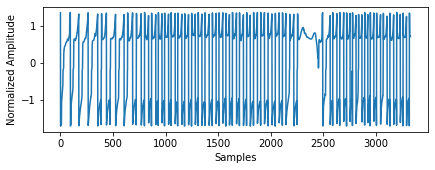

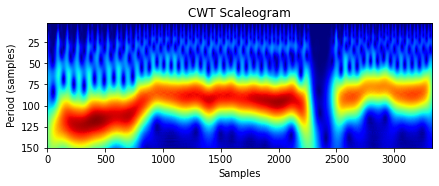

In [18]:
# Visualize using pywt

feat = 8

scales = np.arange(2, f*2)
coefs, freqs = pywt.cwt(X[:,feat], scales, 'cmor-1-1')
coefs = np.abs(coefs)
plt.figure(figsize=(6.9,2.3))
plt.plot(X[:,feat])
plt.xlabel('Samples')
plt.ylabel('Normalized Amplitude')

plt.figure(figsize=(6.9,2.3))
plt.imshow(coefs, extent=[0, time.size, 150, 2], cmap='jet', aspect='auto',
            vmax=coefs.max(), vmin=-coefs.min())
plt.title('CWT Scaleogram')
plt.xlabel('Samples')
plt.ylabel('Period (samples)')
plt.show() 

## Dimensionality Reduction

In [19]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

coefs_reduced = PCA(n_components=10).fit_transform(coefs[:40,:].T)
coefs_embedded = TSNE(n_components=2, perplexity=62, verbose=True).fit_transform(coefs_reduced)



[t-SNE] Computing 187 nearest neighbors...
[t-SNE] Indexed 3330 samples in 0.005s...
[t-SNE] Computed neighbors for 3330 samples in 0.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3330
[t-SNE] Computed conditional probabilities for sample 2000 / 3330
[t-SNE] Computed conditional probabilities for sample 3000 / 3330
[t-SNE] Computed conditional probabilities for sample 3330 / 3330
[t-SNE] Mean sigma: 0.354866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.855354
[t-SNE] KL divergence after 1000 iterations: 0.830541


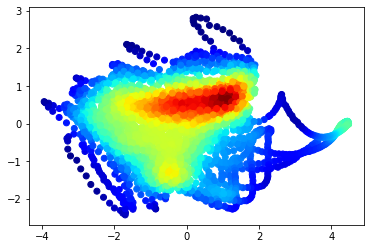

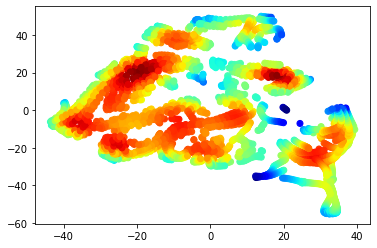

In [20]:

xy = np.vstack([coefs_reduced[:,0], coefs_reduced[:,1]])
z = gaussian_kde(xy)(xy)
plt.figure()
plt.scatter(coefs_reduced[:,0], coefs_reduced[:,1], c=z, cmap='jet')

xy = np.vstack([coefs_embedded[:,0], coefs_embedded[:,1]])
z = gaussian_kde(xy)(xy)
plt.figure()
plt.scatter(coefs_embedded[:,0], coefs_embedded[:,1], c=z, cmap='jet')


## Identifying gait phase using KMeans

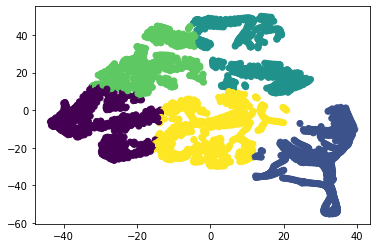

In [26]:
# Kmeans
from sklearn.cluster import KMeans

n_clusters = 5

coefs_pred = KMeans(n_clusters=n_clusters).fit_predict(coefs_embedded)
plt.scatter(coefs_embedded[:,0], coefs_embedded[:,1], c=coefs_pred)

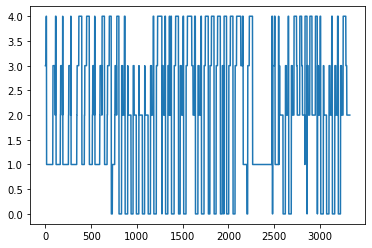

In [27]:
plt.plot(coefs_pred[:to_plot])

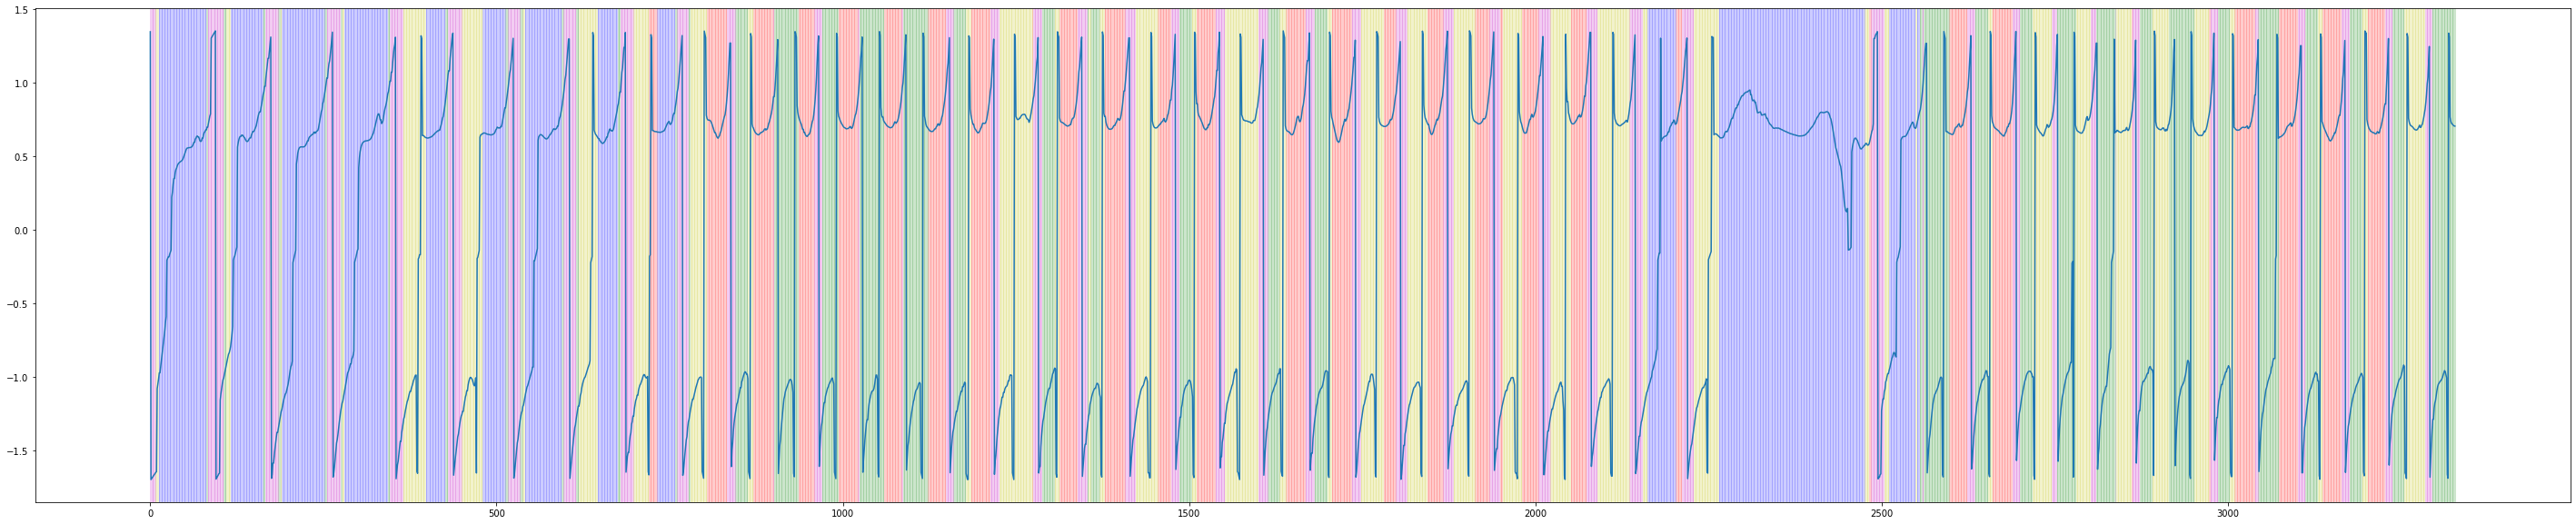

In [28]:
to_plot = -1


colors = ['r','b','g','m','y','k','r']
plt.figure(figsize=(50,10))
plt.plot(X[:,8][:to_plot])
for k in range(n_clusters):
    for i in range(np.where(coefs_pred[:to_plot]==k)[0].size):
        plt.axvspan(np.where(coefs_pred==k)[0][i], np.where(coefs_pred==k)[0][i], color=colors[k], alpha=0.2)


# Code snippets, no longer used

In [263]:
# csv formatting
'''
data_dir = ".\ml_data_v2\csv"
data = []

for f in os.listdir(data_dir):
    if f[0] is not '.':
        df = pd.read_csv(os.path.join(data_dir, f))
        df.columns=['remove0','time','dt','remove1','remove2','Angle','remove3',
                     'grav1','grav2','grav3','remove4','gyro1','gyro2','gyro3',
                     'remove5','magnet1','magnet2','magnet3','remove6',
                     'euler1','euler2','euler3','remove7','accl1','accl2','accl3',
                     'remove8','linaccl1','linaccl2','linaccl3','remove8','quat1',
                     'quat2','quat3','quat4']
        df = df[df.columns.drop(list(df.filter(regex='remove.*')))]
        data.append(df)
        df.to_csv(os.path.join(data_dir,'tmp', f))

data[0].head()'''

'\ndata_dir = ".\\ml_data_v2\\csv"\ndata = []\n\nfor f in os.listdir(data_dir):\n    if f[0] is not \'.\':\n        df = pd.read_csv(os.path.join(data_dir, f))\n        df.columns=[\'remove0\',\'time\',\'dt\',\'remove1\',\'remove2\',\'Angle\',\'remove3\',\n                     \'grav1\',\'grav2\',\'grav3\',\'remove4\',\'gyro1\',\'gyro2\',\'gyro3\',\n                     \'remove5\',\'magnet1\',\'magnet2\',\'magnet3\',\'remove6\',\n                     \'euler1\',\'euler2\',\'euler3\',\'remove7\',\'accl1\',\'accl2\',\'accl3\',\n                     \'remove8\',\'linaccl1\',\'linaccl2\',\'linaccl3\',\'remove8\',\'quat1\',\n                     \'quat2\',\'quat3\',\'quat4\']\n        df = df[df.columns.drop(list(df.filter(regex=\'remove.*\')))]\n        data.append(df)\n        df.to_csv(os.path.join(data_dir,\'tmp\', f))\n\ndata[0].head()'

Default wavelet function used to compute the transform: cmor1-1.5 ( Complex Morlet wavelets )


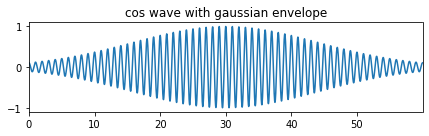

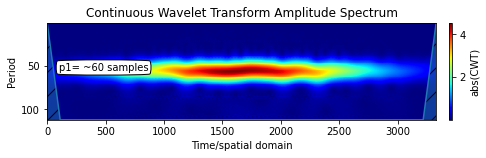

In [142]:
# Kaggle wavelet tutorial

# a range of scales to perform the transform
# 1 period = f samples

scg.set_default_wavelet('cmor1-1')
scales = scg.periods2scales( np.arange(1, f*2) )

# and a periodic signal with varying amplitude
p1=1; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/(2*f))/20)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(time, periodic1); 
ax1.set_xlim(0, max(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1= ~60 samples", xy=(100, f), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

Default wavelet function used to compute the transform: cmor1-1 ( Complex Morlet wavelets )


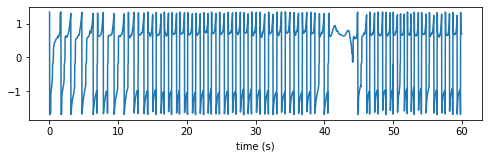

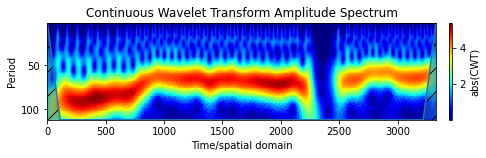

In [220]:
# Kaggle wavelet tutorial

# Visualize using scaleograms package

# a range of scales to perform the transform
# measure period using sameples
# eg. period of 60 samples for signal sampled at 60Hz corresponds to time period of 1s
scg.set_default_wavelet('cmor1-1')

scales = scg.periods2scales( np.arange(2, f*2) )
to_plot = -1

# and a periodic signal with varying amplitude
#p1=1; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/(2*f))/20)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.9,2.3));  
lines = ax1.plot(time[:to_plot], X[:,8][:to_plot]); 
#ax1.set_xlim(0, max(time))
ax1.set_title("")
ax1.set_xlabel("time (s)")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(X[:,8][:to_plot], scales=scales, figsize=(6.9,2.3));
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")